In [1]:
import numpy as np
import pandas as pd
from transformers import BertModel
from keybert import KeyBERT
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

C:\Users\mink5\anaconda3\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\mink5\anaconda3\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
data = pd.read_json('crawling_data(+sentiment_neutral).json', orient = 'records')
data

source  market      date                                      title  \
0        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220608                         ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®Ïû•Ïùò ÏïàÏùºÌïú Ïö¥ÏòÅ   
1        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20210312                                 ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®Ïû•   
2        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20200622                               Ï≤≠ÎÖÑÎ™∞ÏùÑ Ï°∞ÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî!   
3        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20200520                    ÏûêÏñë 1Îèô ÏÉàÎ≤Ω ÎèÑÎ°úÍ≥µÏÇ¨ ÎØºÏõê Ïã†Ï≤≠Ìï©ÎãàÎã§.   
4        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20231012  ÎßùÏõêÏãúÏû• Í≥µÏòÅÏ£ºÏ∞®Ïû• Î∂ÄÎãπÏù¥ÎìùÏùÄ 1ÎÖÑÎÑòÍ≤å Î∞©ÏπòÌïòÍ≥† Ï£ºÏ∞®ÏöîÍ∏àÏùÄ 50ÌçºÏÑºÌä∏ Ïù∏ÏÉÅ   
...     ...     ...       ...                                        ...   
7914  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240316                                          0   
7915  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20231027                                          0   
7916  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20230920                                          0   
7917  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20231211                                          0   
7918  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240306                                          0   

                                                content news  \
0     Ï†ÄÎäî 2022ÎÖÑ 5Ïõî 24Ïùº 13Ïãú 7Î∂Ñ ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ïù¥Ïö©ÏùÑ ÏúÑÌï¥ ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®...    0   
1     ÏïàÎÖïÌïòÏã≠ÎãàÍπå Îã¥ÎãπÏûêÎãò ÏûêÏñëÏ†ÑÌÜµÏãúÏû•ÏùÑ ÏûêÏ£º Ïù¥Ïö©ÌïòÎäîÎç∞ Ïù¥Î≤àÏóê Ï£ºÏ∞®Ïû•ÏùÑ Ïù¥Ïö©ÌïòÎ©¥ÏÑú Î∂àÌé∏...    0   
2     Ï≤≠ÎÖÑ Ïã§ÏóÖÎ¨∏Ï†úÏôÄ Ï†ÑÌÜµÏãúÏû• Î∂ÄÌù•ÏùÑ ÏúÑÌï¥ ÌôîÏñëÏãúÏû• ÌòπÏùÄ ÏûêÏñëÏ†ÑÌÜµÏãúÏû•Ïóê Ï≤≠ÎÖÑÎ™∞ÏùÑ Ï°∞ÏÑ±Ìï¥Ï£º...    0   
3     ÏïàÎÖïÌïòÏÑ∏Ïöî. ÏûêÏñë 1Îèô Ï£ºÎØºÏûÖÎãàÎã§. ÏµúÍ∑º ÏûêÏñëÏ†ÑÌÜµÏãúÏû•ÏúºÎ°ú ÏßÑÏûÖÌïòÎäî Í≥®Î™©Ïùò ÎèÑÎ°úÎ•º Í≥µ...    0   
4     Ï≤®Î∂ÄÏôÄ Í∞ôÏù¥ 2022ÎÖÑ 06Ïõî 18Ïùº ÎßùÏõêÏãúÏû• Í≥µÏòÅÏ£ºÏ∞®Ïû•Ïùò ÏãúÏû•Ìï†Ïù∏ Ï†úÎèÑÏùò Î∂àÌï©Î¶¨Ìïú...    0   
...                                                 ...  ...   
7914  ÌôîÏ∞ΩÌïú Î¥ÑÍ∏∞Ïö¥ Í∞ÄÎìùÌïú ÌÜ†ÏöîÏùºÏöîÍ∏∞ÏöîÍ±∞ ÌôúÏßù Ïó¥ÏóàÏäµÎãàÎã§Î¥ÑÏù¥ ÏÑ±ÌÅº Îã§Í∞ÄÏôîÏñ¥ÏöîÏò§ÎäòÏùÄ ÏöîÍ∏∞Ïöî...    0   
7915  ÏïåÎ°ùÎã¨Î°ùÌïú Î¨¥ÏßÄÍ∞ú Í∞ôÏùÄ Îã≠Í∞ïÏ†ïÏùÑ ÌååÎäî Í≥≥Ïù¥Îã§.ÎßùÏõêÏãúÏû•Ïóê Î∞©Î¨∏ÌïòÎ©¥ Î¨¥Ï°∞Í±¥ Î∞©Î¨∏Ìï¥ÏïºÌïòÍ∏∞...    0   
7916  ÎÇòÏ≤òÎüº ÌõàÌõàÌïú ÏÇ¨ÎûåÎì§Îßå Î∞©Î¨∏Ìï¥Ïïº ÌïòÎäî Í≥≥Ïù¥ ÏûàÎã§.ÏÑúÏö∏ ÎßàÌè¨Íµ¨ ÎßùÏõêÏó≠ ÎßùÏõêÏãúÏû• Í∑ºÏ≤òÏóê...    0   
7917  ÎßùÏõêÏãúÏû• Í∞ôÏù¥ Í∞à ÏπúÍµ¨ ÌÉúÍ∑∏ !!#Ïû¨ÏäêÎû≠ÎßùÏõê #ÎßùÏõêÏãúÏû• #ÎßùÏõêÏãúÏû•Ìà¨Ïñ¥Í∑ºÏ≤ò Îì§Î•º ÏùºÏù¥...    0   
7918  ÎßùÏõêÎèô ÏóÑÏÑ†Ïûë Îç∞Ïù¥Ìä∏ ÏΩîÏä§Ïπ¥ÌéòÏôÄ ÎßõÏßë Í∑∏Î¶¨Í≥† Í∑ÄÏó¨Ïö¥ ÏÜåÌíàÏÉµÍπåÏßÄ!!ÏóÑÏÑ†Ìï¥ÏÑú ÎΩëÏïòÏúºÎãà ...    0   

                                               hashtags revisit reply  \
0                                                     0       0     0   
1                                                     0       0     0   
2                                                     0       0     0   
3                                                     0       0     0   
4                                                     0       0     0   
...                                                 ...     ...   ...   
7914  [#ÎßùÏõêÏãúÏû•, #ÎßùÏõêÎèôÎßõÏßë, #ÎπÑÍ±¥Í∑∏Î¶≠ÏöîÍ±∞Ìä∏ÎßõÏßë, #Í∑∏Î¶≠ÏöîÍ±∞Ìä∏ÎßõÏßë, #ÎßùÎ¶¨Îã®Í∏∏ÎßõÏßë,...       0     0   
7915   [#ÎßùÏõêÎèôÎßõÏßë, #ÎßùÏõêÏãúÏû•, #ÎßàÌè¨Íµ¨ÎßõÏßë, #ÎßùÏõêÏó≠ÎßõÏßë, #Îã≠Í∞ïÏ†ïÎßõÏßë, #ÎßùÏõêÏãúÏû•ÎßõÏßë]       0     0   
7916                        [#ÌõàÌõàÌò∏Îñ°, #Î®πÏÑ∏Í∂å_ÎßàÌè¨Íµ¨, #Î®πÏÑ∏Í∂å_ÎßùÏõêÏó≠]       0     0   
7917  [#Ïû¨ÏäêÎû≠_ÎßùÏõê, #ÎßùÏõêÏãúÏû•, #ÎßùÏõêÏãúÏû•Ìà¨Ïñ¥, #Ïö∞Ïù¥ÎùΩ, #Ïû¨ÏäêÎû≠Í∞ÄÏù¥Îìú, #Ïû¨ÏäêÎû≠,...       0     0   
7918  [#ÎßùÏõêÎèôÎç∞Ïù¥Ìä∏, #ÎßùÏõêÎèôÏÜåÌíàÏÉµ, #ÎßùÏõêÏãúÏû•, #ÎßùÎ¶¨Îã®Í∏∏ÏÜåÌíàÏÉµ, #ÎßùÎ¶¨Îã®Í∏∏Ïπ¥Ìéò, #...       0     0   

      sentiment  
0            -1  
1            -1  
2             0  
3            -1  
4            -1  
...         ...  
7914          1  
7915          1  
7916    

## ÌäπÏàòÎ¨∏ÏûêÎ°úÎßå ÎêòÏñ¥ÏûàÎäî content, Ìïú Í∏ÄÏûêÎ°úÎßå ÎêòÏñ¥ÏûàÎäî contentÎäî Ï†úÍ±∞Ìï® -> ÏµúÏ¢Ö data_new1

In [3]:
# ÌäπÏàòÎ¨∏ÏûêÎ°úÎßå ÎêòÏñ¥ÏûàÎäî content ÏßÄÏö∞Í∏∞
data[data['content'].str.contains(r'^[^\w\s]+$', regex=True)]

source  market      date title content news hashtags revisit reply  \
3359      Íµ¨Í∏ÄÎßµ    ÎßùÏõêÏãúÏû•  20230000     0       .    0        0       0     0   
6492  ÎÑ§Ïù¥Î≤ÑÌîåÎ†àÏù¥Ïä§  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240204     0      ^^    0        0  1Î≤àÏß∏ Î∞©Î¨∏     0   
6507  ÎÑ§Ïù¥Î≤ÑÌîåÎ†àÏù¥Ïä§  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20230709     0     ^^‚ô°    0        0  1Î≤àÏß∏ Î∞©Î¨∏     0   
6589  ÎÑ§Ïù¥Î≤ÑÌîåÎ†àÏù¥Ïä§  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220807     0      ^^    0        0  1Î≤àÏß∏ Î∞©Î¨∏     0   

      sentiment  
3359         -1  
6492          1  
6507          1  
6589          1

In [4]:
nowords_index = data[data['content'].str.contains(r'^[^\w\s]+$', regex=True)].index
data_new = data.drop(nowords_index)
data_new = data_new.reset_index(drop=True)
data_new

source  market      date                                      title  \
0        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220608                         ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®Ïû•Ïùò ÏïàÏùºÌïú Ïö¥ÏòÅ   
1        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20210312                                 ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®Ïû•   
2        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20200622                               Ï≤≠ÎÖÑÎ™∞ÏùÑ Ï°∞ÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî!   
3        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20200520                    ÏûêÏñë 1Îèô ÏÉàÎ≤Ω ÎèÑÎ°úÍ≥µÏÇ¨ ÎØºÏõê Ïã†Ï≤≠Ìï©ÎãàÎã§.   
4        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20231012  ÎßùÏõêÏãúÏû• Í≥µÏòÅÏ£ºÏ∞®Ïû• Î∂ÄÎãπÏù¥ÎìùÏùÄ 1ÎÖÑÎÑòÍ≤å Î∞©ÏπòÌïòÍ≥† Ï£ºÏ∞®ÏöîÍ∏àÏùÄ 50ÌçºÏÑºÌä∏ Ïù∏ÏÉÅ   
...     ...     ...       ...                                        ...   
7910  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240316                                          0   
7911  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20231027                                          0   
7912  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20230920                                          0   
7913  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20231211                                          0   
7914  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240306                                          0   

                                                content news  \
0     Ï†ÄÎäî 2022ÎÖÑ 5Ïõî 24Ïùº 13Ïãú 7Î∂Ñ ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ïù¥Ïö©ÏùÑ ÏúÑÌï¥ ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®...    0   
1     ÏïàÎÖïÌïòÏã≠ÎãàÍπå Îã¥ÎãπÏûêÎãò ÏûêÏñëÏ†ÑÌÜµÏãúÏû•ÏùÑ ÏûêÏ£º Ïù¥Ïö©ÌïòÎäîÎç∞ Ïù¥Î≤àÏóê Ï£ºÏ∞®Ïû•ÏùÑ Ïù¥Ïö©ÌïòÎ©¥ÏÑú Î∂àÌé∏...    0   
2     Ï≤≠ÎÖÑ Ïã§ÏóÖÎ¨∏Ï†úÏôÄ Ï†ÑÌÜµÏãúÏû• Î∂ÄÌù•ÏùÑ ÏúÑÌï¥ ÌôîÏñëÏãúÏû• ÌòπÏùÄ ÏûêÏñëÏ†ÑÌÜµÏãúÏû•Ïóê Ï≤≠ÎÖÑÎ™∞ÏùÑ Ï°∞ÏÑ±Ìï¥Ï£º...    0   
3     ÏïàÎÖïÌïòÏÑ∏Ïöî. ÏûêÏñë 1Îèô Ï£ºÎØºÏûÖÎãàÎã§. ÏµúÍ∑º ÏûêÏñëÏ†ÑÌÜµÏãúÏû•ÏúºÎ°ú ÏßÑÏûÖÌïòÎäî Í≥®Î™©Ïùò ÎèÑÎ°úÎ•º Í≥µ...    0   
4     Ï≤®Î∂ÄÏôÄ Í∞ôÏù¥ 2022ÎÖÑ 06Ïõî 18Ïùº ÎßùÏõêÏãúÏû• Í≥µÏòÅÏ£ºÏ∞®Ïû•Ïùò ÏãúÏû•Ìï†Ïù∏ Ï†úÎèÑÏùò Î∂àÌï©Î¶¨Ìïú...    0   
...                                                 ...  ...   
7910  ÌôîÏ∞ΩÌïú Î¥ÑÍ∏∞Ïö¥ Í∞ÄÎìùÌïú ÌÜ†ÏöîÏùºÏöîÍ∏∞ÏöîÍ±∞ ÌôúÏßù Ïó¥ÏóàÏäµÎãàÎã§Î¥ÑÏù¥ ÏÑ±ÌÅº Îã§Í∞ÄÏôîÏñ¥ÏöîÏò§ÎäòÏùÄ ÏöîÍ∏∞Ïöî...    0   
7911  ÏïåÎ°ùÎã¨Î°ùÌïú Î¨¥ÏßÄÍ∞ú Í∞ôÏùÄ Îã≠Í∞ïÏ†ïÏùÑ ÌååÎäî Í≥≥Ïù¥Îã§.ÎßùÏõêÏãúÏû•Ïóê Î∞©Î¨∏ÌïòÎ©¥ Î¨¥Ï°∞Í±¥ Î∞©Î¨∏Ìï¥ÏïºÌïòÍ∏∞...    0   
7912  ÎÇòÏ≤òÎüº ÌõàÌõàÌïú ÏÇ¨ÎûåÎì§Îßå Î∞©Î¨∏Ìï¥Ïïº ÌïòÎäî Í≥≥Ïù¥ ÏûàÎã§.ÏÑúÏö∏ ÎßàÌè¨Íµ¨ ÎßùÏõêÏó≠ ÎßùÏõêÏãúÏû• Í∑ºÏ≤òÏóê...    0   
7913  ÎßùÏõêÏãúÏû• Í∞ôÏù¥ Í∞à ÏπúÍµ¨ ÌÉúÍ∑∏ !!#Ïû¨ÏäêÎû≠ÎßùÏõê #ÎßùÏõêÏãúÏû• #ÎßùÏõêÏãúÏû•Ìà¨Ïñ¥Í∑ºÏ≤ò Îì§Î•º ÏùºÏù¥...    0   
7914  ÎßùÏõêÎèô ÏóÑÏÑ†Ïûë Îç∞Ïù¥Ìä∏ ÏΩîÏä§Ïπ¥ÌéòÏôÄ ÎßõÏßë Í∑∏Î¶¨Í≥† Í∑ÄÏó¨Ïö¥ ÏÜåÌíàÏÉµÍπåÏßÄ!!ÏóÑÏÑ†Ìï¥ÏÑú ÎΩëÏïòÏúºÎãà ...    0   

                                               hashtags revisit reply  \
0                                                     0       0     0   
1                                                     0       0     0   
2                                                     0       0     0   
3                                                     0       0     0   
4                                                     0       0     0   
...                                                 ...     ...   ...   
7910  [#ÎßùÏõêÏãúÏû•, #ÎßùÏõêÎèôÎßõÏßë, #ÎπÑÍ±¥Í∑∏Î¶≠ÏöîÍ±∞Ìä∏ÎßõÏßë, #Í∑∏Î¶≠ÏöîÍ±∞Ìä∏ÎßõÏßë, #ÎßùÎ¶¨Îã®Í∏∏ÎßõÏßë,...       0     0   
7911   [#ÎßùÏõêÎèôÎßõÏßë, #ÎßùÏõêÏãúÏû•, #ÎßàÌè¨Íµ¨ÎßõÏßë, #ÎßùÏõêÏó≠ÎßõÏßë, #Îã≠Í∞ïÏ†ïÎßõÏßë, #ÎßùÏõêÏãúÏû•ÎßõÏßë]       0     0   
7912                        [#ÌõàÌõàÌò∏Îñ°, #Î®πÏÑ∏Í∂å_ÎßàÌè¨Íµ¨, #Î®πÏÑ∏Í∂å_ÎßùÏõêÏó≠]       0     0   
7913  [#Ïû¨ÏäêÎû≠_ÎßùÏõê, #ÎßùÏõêÏãúÏû•, #ÎßùÏõêÏãúÏû•Ìà¨Ïñ¥, #Ïö∞Ïù¥ÎùΩ, #Ïû¨ÏäêÎû≠Í∞ÄÏù¥Îìú, #Ïû¨ÏäêÎû≠,...       0     0   
7914  [#ÎßùÏõêÎèôÎç∞Ïù¥Ìä∏, #ÎßùÏõêÎèôÏÜåÌíàÏÉµ, #ÎßùÏõêÏãúÏû•, #ÎßùÎ¶¨Îã®Í∏∏ÏÜåÌíàÏÉµ, #ÎßùÎ¶¨Îã®Í∏∏Ïπ¥Ìéò, #...       0     0   

      sentiment  
0            -1  
1            -1  
2             0  
3            -1  
4            -1  
...         ...  
7910          1  
7911          1  
7912    

In [5]:
data_new['content_length'] = data_new['content'].str.len()

In [6]:
onecon_id = data_new[data_new['content_length']==1].index # contentÍ∞Ä Ìïú Í∏ÄÏûêÏù∏ Í≤ΩÏö∞ Ï†úÍ±∞
data_new1 = data_new.drop(onecon_id)
data_new1 = data_new1.reset_index(drop = True)
data_new1

source  market      date                                      title  \
0        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220608                         ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®Ïû•Ïùò ÏïàÏùºÌïú Ïö¥ÏòÅ   
1        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20210312                                 ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®Ïû•   
2        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20200622                               Ï≤≠ÎÖÑÎ™∞ÏùÑ Ï°∞ÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî!   
3        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20200520                    ÏûêÏñë 1Îèô ÏÉàÎ≤Ω ÎèÑÎ°úÍ≥µÏÇ¨ ÎØºÏõê Ïã†Ï≤≠Ìï©ÎãàÎã§.   
4        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20231012  ÎßùÏõêÏãúÏû• Í≥µÏòÅÏ£ºÏ∞®Ïû• Î∂ÄÎãπÏù¥ÎìùÏùÄ 1ÎÖÑÎÑòÍ≤å Î∞©ÏπòÌïòÍ≥† Ï£ºÏ∞®ÏöîÍ∏àÏùÄ 50ÌçºÏÑºÌä∏ Ïù∏ÏÉÅ   
...     ...     ...       ...                                        ...   
7796  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240316                                          0   
7797  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20231027                                          0   
7798  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20230920                                          0   
7799  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20231211                                          0   
7800  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240306                                          0   

                                                content news  \
0     Ï†ÄÎäî 2022ÎÖÑ 5Ïõî 24Ïùº 13Ïãú 7Î∂Ñ ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ïù¥Ïö©ÏùÑ ÏúÑÌï¥ ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®...    0   
1     ÏïàÎÖïÌïòÏã≠ÎãàÍπå Îã¥ÎãπÏûêÎãò ÏûêÏñëÏ†ÑÌÜµÏãúÏû•ÏùÑ ÏûêÏ£º Ïù¥Ïö©ÌïòÎäîÎç∞ Ïù¥Î≤àÏóê Ï£ºÏ∞®Ïû•ÏùÑ Ïù¥Ïö©ÌïòÎ©¥ÏÑú Î∂àÌé∏...    0   
2     Ï≤≠ÎÖÑ Ïã§ÏóÖÎ¨∏Ï†úÏôÄ Ï†ÑÌÜµÏãúÏû• Î∂ÄÌù•ÏùÑ ÏúÑÌï¥ ÌôîÏñëÏãúÏû• ÌòπÏùÄ ÏûêÏñëÏ†ÑÌÜµÏãúÏû•Ïóê Ï≤≠ÎÖÑÎ™∞ÏùÑ Ï°∞ÏÑ±Ìï¥Ï£º...    0   
3     ÏïàÎÖïÌïòÏÑ∏Ïöî. ÏûêÏñë 1Îèô Ï£ºÎØºÏûÖÎãàÎã§. ÏµúÍ∑º ÏûêÏñëÏ†ÑÌÜµÏãúÏû•ÏúºÎ°ú ÏßÑÏûÖÌïòÎäî Í≥®Î™©Ïùò ÎèÑÎ°úÎ•º Í≥µ...    0   
4     Ï≤®Î∂ÄÏôÄ Í∞ôÏù¥ 2022ÎÖÑ 06Ïõî 18Ïùº ÎßùÏõêÏãúÏû• Í≥µÏòÅÏ£ºÏ∞®Ïû•Ïùò ÏãúÏû•Ìï†Ïù∏ Ï†úÎèÑÏùò Î∂àÌï©Î¶¨Ìïú...    0   
...                                                 ...  ...   
7796  ÌôîÏ∞ΩÌïú Î¥ÑÍ∏∞Ïö¥ Í∞ÄÎìùÌïú ÌÜ†ÏöîÏùºÏöîÍ∏∞ÏöîÍ±∞ ÌôúÏßù Ïó¥ÏóàÏäµÎãàÎã§Î¥ÑÏù¥ ÏÑ±ÌÅº Îã§Í∞ÄÏôîÏñ¥ÏöîÏò§ÎäòÏùÄ ÏöîÍ∏∞Ïöî...    0   
7797  ÏïåÎ°ùÎã¨Î°ùÌïú Î¨¥ÏßÄÍ∞ú Í∞ôÏùÄ Îã≠Í∞ïÏ†ïÏùÑ ÌååÎäî Í≥≥Ïù¥Îã§.ÎßùÏõêÏãúÏû•Ïóê Î∞©Î¨∏ÌïòÎ©¥ Î¨¥Ï°∞Í±¥ Î∞©Î¨∏Ìï¥ÏïºÌïòÍ∏∞...    0   
7798  ÎÇòÏ≤òÎüº ÌõàÌõàÌïú ÏÇ¨ÎûåÎì§Îßå Î∞©Î¨∏Ìï¥Ïïº ÌïòÎäî Í≥≥Ïù¥ ÏûàÎã§.ÏÑúÏö∏ ÎßàÌè¨Íµ¨ ÎßùÏõêÏó≠ ÎßùÏõêÏãúÏû• Í∑ºÏ≤òÏóê...    0   
7799  ÎßùÏõêÏãúÏû• Í∞ôÏù¥ Í∞à ÏπúÍµ¨ ÌÉúÍ∑∏ !!#Ïû¨ÏäêÎû≠ÎßùÏõê #ÎßùÏõêÏãúÏû• #ÎßùÏõêÏãúÏû•Ìà¨Ïñ¥Í∑ºÏ≤ò Îì§Î•º ÏùºÏù¥...    0   
7800  ÎßùÏõêÎèô ÏóÑÏÑ†Ïûë Îç∞Ïù¥Ìä∏ ÏΩîÏä§Ïπ¥ÌéòÏôÄ ÎßõÏßë Í∑∏Î¶¨Í≥† Í∑ÄÏó¨Ïö¥ ÏÜåÌíàÏÉµÍπåÏßÄ!!ÏóÑÏÑ†Ìï¥ÏÑú ÎΩëÏïòÏúºÎãà ...    0   

                                               hashtags revisit reply  \
0                                                     0       0     0   
1                                                     0       0     0   
2                                                     0       0     0   
3                                                     0       0     0   
4                                                     0       0     0   
...                                                 ...     ...   ...   
7796  [#ÎßùÏõêÏãúÏû•, #ÎßùÏõêÎèôÎßõÏßë, #ÎπÑÍ±¥Í∑∏Î¶≠ÏöîÍ±∞Ìä∏ÎßõÏßë, #Í∑∏Î¶≠ÏöîÍ±∞Ìä∏ÎßõÏßë, #ÎßùÎ¶¨Îã®Í∏∏ÎßõÏßë,...       0     0   
7797   [#ÎßùÏõêÎèôÎßõÏßë, #ÎßùÏõêÏãúÏû•, #ÎßàÌè¨Íµ¨ÎßõÏßë, #ÎßùÏõêÏó≠ÎßõÏßë, #Îã≠Í∞ïÏ†ïÎßõÏßë, #ÎßùÏõêÏãúÏû•ÎßõÏßë]       0     0   
7798                        [#ÌõàÌõàÌò∏Îñ°, #Î®πÏÑ∏Í∂å_ÎßàÌè¨Íµ¨, #Î®πÏÑ∏Í∂å_ÎßùÏõêÏó≠]       0     0   
7799  [#Ïû¨ÏäêÎû≠_ÎßùÏõê, #ÎßùÏõêÏãúÏû•, #ÎßùÏõêÏãúÏû•Ìà¨Ïñ¥, #Ïö∞Ïù¥ÎùΩ, #Ïû¨ÏäêÎû≠Í∞ÄÏù¥Îìú, #Ïû¨ÏäêÎû≠,...       0     0   
7800  [#ÎßùÏõêÎèôÎç∞Ïù¥Ìä∏, #ÎßùÏõêÎèôÏÜåÌíàÏÉµ, #ÎßùÏõêÏãúÏû•, #ÎßùÎ¶¨Îã®Í∏∏ÏÜåÌíàÏÉµ, #ÎßùÎ¶¨Îã®Í∏∏Ïπ¥Ìéò, #...       0     0   

      sentiment  content_length  
0            -1            1908  
1            -1            1031  
2             0             422  
3            -1             446  


### Í∏çÏ†ï, Ï§ëÎ¶Ω, Î∂ÄÏ†ï Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [7]:
sentiment_1 = data_new1[data_new1['sentiment'] == 1]
sentiment_0 = data_new1[data_new1['sentiment'] == 0]
sentiment_1_ = data_new1[data_new1['sentiment'] == -1]

## 1. ÎèôÏÇ¨, ÌòïÏö©ÏÇ¨, Î™ÖÏÇ¨ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú

In [23]:
# loading Klue-bert model
bert_model = BertModel.from_pretrained("klue/bert-base")
kw_model = KeyBERT(bert_model)

# loading stopwords list
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = [line.strip() for line in f]
    return set(stopwords)

# remove stopwords function
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    filtered_text = " ".join(filtered_words)
    return filtered_text

stopwords_file = 'stopword.txt'
stopwords = load_stopwords(stopwords_file)

# remove emojis function
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
    cleaned_text = re.sub(emoji_pattern, '', text)
    return cleaned_text

# preprocess words function
def preprocess_words_new(text):
    okt = Okt()
    text = re.sub(r"[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£a-zA-Z0-9\s]", "", text)
    text = remove_emojis(text)
    text = okt.normalize(text)
    words = okt.pos(text, stem=True)
    nouns_adj_verbs = [word[0] for word in words if word[1] in ['Noun', 'Adjective', 'Verb']]
    additional_stopwords = {'Ïò§Îäò', 'ÎÇ¥Ïùº','Îã§ÏùåÎÇ†','Îã§Ïùå','Î™®Î†à','Ïñ¥Ï†ú', 'Ïù¥Î≤àÏ£º', 'Îã§ÏùåÏ£º', 'Ïù¥Î≤àÎã¨', 'Ïò¨Ìï¥','Îã§ÏùåÎã¨','ÏûëÎÖÑ','ÎÇ¥ÎÖÑ',
                            'ÏòàÏ†Ñ','ÌïúÎ≤à','ÎëêÎ≤à','ÎßéÎã§','Î®πÎã§','ÎìúÎ¶¨Îã§','Ï£ºÎã§','ÏûêÏ£º','Ï¢ÖÏ¢Ö','ÏßÄÎÇòÍ∞ÄÎã§','Îì§Î¶¨Îã§',
                           'ÏãúÏû•', 'Ïû¨ÎûòÏãúÏû•', 'Ï¢ãÎã§', 'ÏÑúÏö∏', 'Îì§Ïñ¥Í∞ÄÎã§', 'Í∞ÄÎ≥¥Îã§','Í∞ÄÎã§','Í∞ÄÏïº','Ïò§Îã§','Í∑∏ÎÉ•','ÏÇ¨Îûå',
                           'Î≥¥Îã§', 'ÎßõÎ≥¥Îã§', 'Î≥¥Í≥†','ÏÇ¥Îã§','Ï†ïÎßê','Í∞ÄÎ©¥','Ïò§Î©¥','Ï∞çÎã§','Îì§Îã§','Ìï¥Î≥¥Îã§','Îã§ÎÖÄÏò§Îã§','ÏÉùÍ∏∞Îã§',
                           'Ï¢ãÏïÑÌïòÎã§','ÎßûÎã§','ÎßåÎÇòÎã§','ÎßùÏõê','ÏûêÏñë','ÎßùÏõêÏãúÏû•','ÏûêÏñëÏãúÏû•','ÏûêÎã§','ÏÑúÏö∏Ïãú','ÏúÑÌï¥','ÏïàÎÖï','ÏïàÎÖïÌïòÎã§',
                           'Î≥¥Í≥†Ïò§Îã§','ÎåÄÌï¥','ÏïåÍ≥†Ïã∂Îã§','ÎπºÎã§','Í∞ÄÏ§Ñ','ÏµúÍ∑º','ÎïåÎ¨∏','Í∑ºÏ≤ò','ÌïúÍµ≠', 'Í≤ÄÏ∞∞', 'ÎèÖÏû¨', 'ÎØºÏ£ºÎãπ','Ï¥ùÏû•',
                           'ÏÑ±ÎÇ®','Ïù¥Ïû¨Î™Ö','Ï†ïÏπò','Ï†ïÏπòÍ≤ÄÏ∞∞'}
    total_stopwords = stopwords.union(additional_stopwords)
    filtered_words = [word for word in nouns_adj_verbs if word not in total_stopwords]
    final_text = " ".join(filtered_words)
    return final_text

# extract keywords function
def extract_keywords(text):
    keywords_with_scores = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=5)
    keywords = [keyword for keyword, _ in keywords_with_scores]
    return keywords


In [24]:
sentiment_1_key = sentiment_1.copy()
sentiment_1_key['content'] = sentiment_1_key['content'].astype(str)
sentiment_1_key['content_keywords'] = sentiment_1_key['content'].apply(preprocess_words_new).apply(extract_keywords)
sentiment_1_key

source  market      date                       title  \
9            ÎØºÏõê    ÎßùÏõêÏãúÏû•  20221220  Í≤ΩÏÑ±Ï§ëÍ≥†ÏÇ¨Í±∞Î¶¨ Îî∞Î¶âÏù¥ ÎåÄÏó¨ÏÜå ÏÑ§Ïπò ÏöîÏ≤≠ÎìúÎ¶Ω ÎãàÎã§   
50    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220929                           0   
53    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220518                           0   
65    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20221020                           0   
68    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240310                           0   
...         ...     ...       ...                         ...   
7796      Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240316                           0   
7797      Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20231027                           0   
7798      Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20230920                           0   
7799      Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20231211                           0   
7800      Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240306                           0   

                                                content news  \
9     ÏïàÎÖïÌïòÏÑ∏Ïöî. Ï†ÄÎäî Îî∞Î¶âÏù¥Î•º Ïï†Ïö©ÌïòÎäî ÎßàÌè¨Íµ¨ÎØºÏûÖÎãàÎã§. ÏÉÅÏïîÎèôÏóêÎäî Îî∞Î¶âÏù¥ ÎåÄÏó¨ÏÜåÎ•º ÏïÑÏ£º...    0   
50    Ïï± ÏïåÎ¶ºÍ≥º Ï£ºÎ¨∏, Î∞∞Îã¨ÍπåÏßÄ Î™®Îëê ÎßåÏ°±Ïä§Îü¨Ïõ†Ïñ¥Ïöî. ÌäπÌûà Ï≤´Íµ¨Îß§, Ïû¨Íµ¨Îß§ ÌòúÌÉùÏúºÎ°ú Îßå ...    0   
53    Îü∞Ïπ≠ÌïúÏßÄ ÏñºÎßà ÏïàÎêêÎã§Í≥† ÏïÑÎäîÎç∞ Í∑∏Îü∞ Í≤É ÏπòÍ≥†Îäî Ïï± Íµ¨ÎèôÏùÄ ÏïàÏ†ïÏ†ÅÏù¥ÎÑ§Ïöî. ÎåÄÏã† Î≠ê Î≥¥...    0   
65    Ïûò ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Ïö∞ÏÑ† Ïù¥Î≤§Ìä∏ÎÇò ÌòúÌÉùÎèÑ ÎßéÍ≥† Ìï†Ïù∏Ïø†Ìè∞ÎèÑ Ïó¨Îü¨ Ïø†Ìè∞ Ï§ëÏ≤© ÏÇ¨Ïö©Í∞Ä...    0   
68    Ï¥àÍ∏∞ÏóêÎäî Í∞ÄÎßπÏ†ê ÏàòÍ∞Ä Ï†ÅÏñ¥ÏÑú ÎßéÏù¥ Ïù¥Ïö© Î™ªÌñàÏßÄÎßå ÏßÄÍ∏àÏùÄ Ïô†ÎßåÌïú ÏùåÏãùÏùÄ Îã§ ÏãúÌÇ¨ Ïàò ...    0   
...                                                 ...  ...   
7796  ÌôîÏ∞ΩÌïú Î¥ÑÍ∏∞Ïö¥ Í∞ÄÎìùÌïú ÌÜ†ÏöîÏùºÏöîÍ∏∞ÏöîÍ±∞ ÌôúÏßù Ïó¥ÏóàÏäµÎãàÎã§Î¥ÑÏù¥ ÏÑ±ÌÅº Îã§Í∞ÄÏôîÏñ¥ÏöîÏò§ÎäòÏùÄ ÏöîÍ∏∞Ïöî...    0   
7797  ÏïåÎ°ùÎã¨Î°ùÌïú Î¨¥ÏßÄÍ∞ú Í∞ôÏùÄ Îã≠Í∞ïÏ†ïÏùÑ ÌååÎäî Í≥≥Ïù¥Îã§.ÎßùÏõêÏãúÏû•Ïóê Î∞©Î¨∏ÌïòÎ©¥ Î¨¥Ï°∞Í±¥ Î∞©Î¨∏Ìï¥ÏïºÌïòÍ∏∞...    0   
7798  ÎÇòÏ≤òÎüº ÌõàÌõàÌïú ÏÇ¨ÎûåÎì§Îßå Î∞©Î¨∏Ìï¥Ïïº ÌïòÎäî Í≥≥Ïù¥ ÏûàÎã§.ÏÑúÏö∏ ÎßàÌè¨Íµ¨ ÎßùÏõêÏó≠ ÎßùÏõêÏãúÏû• Í∑ºÏ≤òÏóê...    0   
7799  ÎßùÏõêÏãúÏû• Í∞ôÏù¥ Í∞à ÏπúÍµ¨ ÌÉúÍ∑∏ !!#Ïû¨ÏäêÎû≠ÎßùÏõê #ÎßùÏõêÏãúÏû• #ÎßùÏõêÏãúÏû•Ìà¨Ïñ¥Í∑ºÏ≤ò Îì§Î•º ÏùºÏù¥...    0   
7800  ÎßùÏõêÎèô ÏóÑÏÑ†Ïûë Îç∞Ïù¥Ìä∏ ÏΩîÏä§Ïπ¥ÌéòÏôÄ ÎßõÏßë Í∑∏Î¶¨Í≥† Í∑ÄÏó¨Ïö¥ ÏÜåÌíàÏÉµÍπåÏßÄ!!ÏóÑÏÑ†Ìï¥ÏÑú ÎΩëÏïòÏúºÎãà ...    0   

                                               hashtags revisit reply  \
9                                                     0       0     0   
50                                                    0       0     0   
53                                                    0       0     0   
65                                                    0       0     0   
68                                                    0       0     0   
...                                                 ...     ...   ...   
7796  [#ÎßùÏõêÏãúÏû•, #ÎßùÏõêÎèôÎßõÏßë, #ÎπÑÍ±¥Í∑∏Î¶≠ÏöîÍ±∞Ìä∏ÎßõÏßë, #Í∑∏Î¶≠ÏöîÍ±∞Ìä∏ÎßõÏßë, #ÎßùÎ¶¨Îã®Í∏∏ÎßõÏßë,...       0     0   
7797   [#ÎßùÏõêÎèôÎßõÏßë, #ÎßùÏõêÏãúÏû•, #ÎßàÌè¨Íµ¨ÎßõÏßë, #ÎßùÏõêÏó≠ÎßõÏßë, #Îã≠Í∞ïÏ†ïÎßõÏßë, #ÎßùÏõêÏãúÏû•ÎßõÏßë]       0     0   
7798                        [#ÌõàÌõàÌò∏Îñ°, #Î®πÏÑ∏Í∂å_ÎßàÌè¨Íµ¨, #Î®πÏÑ∏Í∂å_ÎßùÏõêÏó≠]       0     0   
7799  [#Ïû¨ÏäêÎû≠_ÎßùÏõê, #ÎßùÏõêÏãúÏû•, #ÎßùÏõêÏãúÏû•Ìà¨Ïñ¥, #Ïö∞Ïù¥ÎùΩ, #Ïû¨ÏäêÎû≠Í∞ÄÏù¥Îìú, #Ïû¨ÏäêÎû≠,...       0     0   
7800  [#ÎßùÏõêÎèôÎç∞Ïù¥Ìä∏, #ÎßùÏõêÎèôÏÜåÌíàÏÉµ, #ÎßùÏõêÏãúÏû•, #ÎßùÎ¶¨Îã®Í∏∏ÏÜåÌíàÏÉµ, #ÎßùÎ¶¨Îã®Í∏∏Ïπ¥Ìéò, #...       0     0   

      sentiment  content_length             content_keywords  
9             1             579        [Î≥¥ÌñâÏûê, ÌÜµÌñâ, ÎèÑÏ∞©, Î≤ÑÏä§, Î∂ÅÎ°ú]  
50            1             222  [ÎßåÏ°±Ïä§ÎüΩÎã§, Ìï†Ïù∏, ÎàÑÎ•¥Îã§, Î∏åÎûúÎìú, Í∞êÏÇ¨ÌïòÎã§]  
53            1             159        [Ï†ÅÎã§, ÎåÄÏã†, ÎÇÆÎã§, ÏïåÎã§, Î≤ÑÎ≤ÖÏù¥]  
65            1             208 

In [25]:
sentiment_0_key = sentiment_0.copy()
sentiment_0_key['content'] = sentiment_0_key['content'].astype(str)
sentiment_0_key['content_keywords'] = sentiment_0_key['content'].apply(preprocess_words_new).apply(extract_keywords)
sentiment_0_key

source  market      date  \
2        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20200622   
5        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20230814   
6        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20230801   
7        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20230723   
8        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20230627   
...     ...     ...       ...   
7760  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240125   
7762  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240129   
7768  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240226   
7782  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240316   
7785  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240313   

                                                  title  \
2                                          Ï≤≠ÎÖÑÎ™∞ÏùÑ Ï°∞ÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî!   
5                ÎßùÏõêÏãúÏû•Ïùò Ïù¥ÏÉÅÌïú ÏòÅÏñ¥ Í∞ÑÌåê - harmony and pleasant   
6                      Ïù¥ÏÉÅÌïú ÎßùÏõêÎ°úÏùò ÎßùÏõêÏãúÏû•-ÏõîÎìúÏªµÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÍ∞Ñ Ìö°Îã®Î≥¥ÎèÑ 2   
7                        Ïù¥ÏÉÅÌïú ÎßùÏõêÎ°úÏùò ÎßùÏõêÏãúÏû•-ÏõîÎìúÏªµÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÍ∞Ñ Ìö°Îã®Î≥¥ÎèÑ   
8                                    ÎßùÏõêÎèô ÏãúÏû•Í±∞Î¶¨ Î∞úÏ†ÑÏùÑ ÏúÑÌïú Ï†úÏñ∏   
...                                                 ...   
7760                     2228ÏàòÌçºÎ∞îÏù¥Ï†Ä ÏßÄÏó≠ÏÉÅÍ∂å ÌôúÏÑ±Ìôî ÌñâÏÇ¨ ÏàòÌçºÎ∞îÏù¥Ï†Ä Î™®Ïßë   
7762                 Í¥ëÏßÑÏª§Ìäº ÏûêÏñëÎèôÏª§Ìäº Ï∞®Î•¥Î•¥ Î∏îÎùºÏù∏Îìú ÌôîÏù¥Ìä∏Ïù∏ÌÖåÎ¶¨Ïñ¥ Î∞©Î¨∏Ï∂úÏû•ÏÑ§Ïπò   
7768  ÌôîÏñëÎèô 371Î≤àÏßÄ ÏùºÏõê Í±¥ÎåÄÏó≠ Î™®ÏïÑÌÉÄÏö¥ ÌôçÎ≥¥Í¥ÄÏóêÏÑú ÎèôÏùòÏÑú ÏßïÍµ¨ÏãúÏûëÌïúÎã§ÎÑ§Ïöî .. Ïï†Í≤¨...   
7782                                                  0   
7785                                                  0   

                                                content news  \
2     Ï≤≠ÎÖÑ Ïã§ÏóÖÎ¨∏Ï†úÏôÄ Ï†ÑÌÜµÏãúÏû• Î∂ÄÌù•ÏùÑ ÏúÑÌï¥ ÌôîÏñëÏãúÏû• ÌòπÏùÄ ÏûêÏñëÏ†ÑÌÜµÏãúÏû•Ïóê Ï≤≠ÎÖÑÎ™∞ÏùÑ Ï°∞ÏÑ±Ìï¥Ï£º...    0   
5     Ï£ºÎßêÏóê ÎßùÏõêÏãúÏû•Ïóê Í∞îÎã§Í∞Ä ÎßùÏõêÏãúÏû•Í≥º ÏõîÎìúÏªµÏãúÏû• ÏÇ¨Ïù¥ ÎèÑÎ°úÎ≥ÄÏóê Î∂ôÏñ¥ ÏûàÎäî Ï≤®Î∂ÄÌïú ÎßùÏõê...    0   
6     ÏÉàÏò¨ Ï†ÑÏûêÎØºÏõêÏ∞ΩÍµ¨Í∞Ä Ïù¥ÏÉÅÌïòÏó¨ Ïù¥ÏÜ°Ìïú ÎØºÏõêÏùÄ ÎèôÏùºÎØºÏõêÏúºÎ°ú ÏÑ†ÌÉùÌï† Ïàò ÏóÜÏñ¥ÏÑú Ïù¥Ï†Ñ ÎØºÏõê...    0   
7     ÎßùÏõêÎ°úÏùò ÎßùÏõêÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÏôÄ ÏõîÎìúÏªµÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÍ∞ÑÏóê Ìö°Îã®Î≥¥ÎèÑÍ∞Ä Ï≤®Î∂ÄÏôÄ Í∞ôÏù¥ Ïù¥ÏÉÅÌïòÍ≤å...    0   
8     ÎßùÏõêÎèôÏùÄ ÏµúÍ∑º MZÏÑ∏ÎåÄÎì§ÏóêÍ≤å Ìï´ÌîåÎ†àÏù¥Ïä§Î°ú Í∏âÎ∂ÄÏÉÅÌïòÍ≥† ÏûàÎäî ÏßÄÏó≠ÏûÖÎãàÎã§. ÏÑ±Ïàò, Ïó∞ÎÇ®,...    0   
...                                                 ...  ...   
7760  ÏßÄÏó≠ÏÉÅÍ∂å ÌôúÏÑ±Ìôî ÌîÑÎ°úÏ†ùÌä∏ ÏàòÌçºÎ∞îÏù¥Ï†Ä Î™®Ïßë ÏïàÎÇ¥ 2Ïõî 02Ïùº08ÏùºÍπåÏßÄ ÏßÑÌñâÎêòÎäî ÏßÄÏó≠Ïãú...    0   
7762   Í¥ëÏßÑÏª§Ìäº ÏûêÏñëÎèôÏª§Ìäº Ï∞®Î•¥Î•¥ Î∏îÎùºÏù∏Îìú ÌôîÏù¥Ìä∏Ïù∏ÌÖåÎ¶¨Ïñ¥ Î∞©Î¨∏Ï∂úÏû•ÏÑ§Ïπò Í¥ëÏßÑÍµ¨ Ïª§Ìäº Ï§ëÍ≥°Îèô...    0   
7768  ÏûêÏñë4Îèô Î™®ÏïÑÌÉÄÏö¥Ïù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï°∞Ìï©ÏÑ§Î¶ΩÏùÑ ÏúÑÌïú Ï∞ΩÎ¶ΩÏ¥ùÌöåÍ∞Ä ÌÜµÍ≥ºÎèºÍ≥† ÎÇòÎãà ÏûêÏñë1Îèô 2...    0   
7782  .. Ï°∞Í∏à Î©ÄÎ¶¨ Î®πÏñ¥ Î≥¥ÏïòÎã§  ÏïÑÏù¥Ïä§Í∞Ä Îì§Ïñ¥Í∞Ñ ÎßàÏãúÎ©úÎ°ú  Ï£ºÎ¨∏ÌïòÎ©¥ Í∑∏ ÏûêÎ¶¨ÏóêÏÑú Íµ¨Ïõå...    0   
7785  #ÏΩòÏõ∞  ÏÑúÏö∏ ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ°ú15Í∏∏ 40 2Ï∏µ ÏΩòÏõ∞Ïª§Ìîº12002200Ìú¥Î¨¥ ÎßùÏõêÏó≠ 2Î≤àÏ∂úÍµ¨    0   

                                           hashtags revisit  \
2                                                 0       0   
5                                                 0       0   
6                                                 0       0   
7                                                 0       0   
8                                                 0       0   
...                                             ...     ...   
7760                                              0       0   
7762                                              0       0   
7768                                              0       0   
7782  [#ÎßùÏõêÏãúÏû•, #ÎßåÏõêÏãúÏû•, #ÌïúÍµ≠Ïó¨Ìñâ, #ÌïúÍµ≠Ïó¨Ìñâ, #ÎßàÏãúÎ©úÎ°úÏïÑÏù¥Ïä§, #ÌïúÍµ≠ÏùåÏãù]       0   
7785                                          [#ÏΩòÏõ∞]       0   

                                                  reply  sentiment  \
2                                                     0          

In [26]:
sentiment_1m_key = sentiment_1_.copy()
sentiment_1m_key['content'] = sentiment_1m_key['content'].astype(str)
sentiment_1m_key['content_keywords'] = sentiment_1m_key['content'].apply(preprocess_words_new).apply(extract_keywords)
sentiment_1m_key

source  market      date                                      title  \
0        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220608                         ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®Ïû•Ïùò ÏïàÏùºÌïú Ïö¥ÏòÅ   
1        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20210312                                 ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®Ïû•   
3        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20200520                    ÏûêÏñë 1Îèô ÏÉàÎ≤Ω ÎèÑÎ°úÍ≥µÏÇ¨ ÎØºÏõê Ïã†Ï≤≠Ìï©ÎãàÎã§.   
4        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20231012  ÎßùÏõêÏãúÏû• Í≥µÏòÅÏ£ºÏ∞®Ïû• Î∂ÄÎãπÏù¥ÎìùÏùÄ 1ÎÖÑÎÑòÍ≤å Î∞©ÏπòÌïòÍ≥† Ï£ºÏ∞®ÏöîÍ∏àÏùÄ 50ÌçºÏÑºÌä∏ Ïù∏ÏÉÅ   
10       ÎØºÏõê    ÎßùÏõêÏãúÏû•  20220515                       ÏãùÌíà ÏúÑÏÉùÎ≤ï ÏúÑÎ∞òÌïú ÏóÖÏ≤¥ Í≥†Î∞úÌï©ÎãàÎã§.   
...     ...     ...       ...                                        ...   
7759  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240113                                Íµ¨ÌîºÏÇ¨ÎûëÏªµ Î¶¥Î†àÏù¥#8   
7764  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240205        Ï†ÅÏ§ë!!!  ÏûêÏñëÍ≥®Î™©ÏãúÏû• Ï£ºÎ≥Ä ÎÖ∏ÌõÑÏ£ºÍ±∞ÏßÄft. 2040 Í¥ëÏßÑÌîåÎûú   
7765  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240211                                  Ï°∞ÏñëÎßàÌä∏ Ï≤´Î∞©Î¨∏Í∏∞   
7770  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240302                           ÏûêÏñëÏ†ÑÌÜµÏãúÏû•Ïóê Ïû•Î≥¥Îü¨ ÏôîÏñ¥Ïöî    
7789  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240316                                          0   

                                                content news  \
0     Ï†ÄÎäî 2022ÎÖÑ 5Ïõî 24Ïùº 13Ïãú 7Î∂Ñ ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ïù¥Ïö©ÏùÑ ÏúÑÌï¥ ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®...    0   
1     ÏïàÎÖïÌïòÏã≠ÎãàÍπå Îã¥ÎãπÏûêÎãò ÏûêÏñëÏ†ÑÌÜµÏãúÏû•ÏùÑ ÏûêÏ£º Ïù¥Ïö©ÌïòÎäîÎç∞ Ïù¥Î≤àÏóê Ï£ºÏ∞®Ïû•ÏùÑ Ïù¥Ïö©ÌïòÎ©¥ÏÑú Î∂àÌé∏...    0   
3     ÏïàÎÖïÌïòÏÑ∏Ïöî. ÏûêÏñë 1Îèô Ï£ºÎØºÏûÖÎãàÎã§. ÏµúÍ∑º ÏûêÏñëÏ†ÑÌÜµÏãúÏû•ÏúºÎ°ú ÏßÑÏûÖÌïòÎäî Í≥®Î™©Ïùò ÎèÑÎ°úÎ•º Í≥µ...    0   
4     Ï≤®Î∂ÄÏôÄ Í∞ôÏù¥ 2022ÎÖÑ 06Ïõî 18Ïùº ÎßùÏõêÏãúÏû• Í≥µÏòÅÏ£ºÏ∞®Ïû•Ïùò ÏãúÏû•Ìï†Ïù∏ Ï†úÎèÑÏùò Î∂àÌï©Î¶¨Ìïú...    0   
10    Î≥∏Ïù∏ÏùÄ Í∏ÄÏùÑ Ïò¨Î¶¨Îäî Í∏àÏùº ÎßàÌè¨Íµ¨ ÎßùÏõêÏãúÏû•Ïóê ÏûàÎäî ÎØºÏòÅÌôúÏñ¥ÌöüÏßëÏóêÏÑú Ïµ∏Î∞•ÏùÑ ÏÉÄÍ≥† Í∞ÑÏû•Í≥º...    0   
...                                                 ...  ...   
7759  Ïª§Ìîº Î®∏Ïã†Ïù¥ ÏàòÎèôÏù∏Îç∞Îã§ ÌïúÎëêÏûî ÎΩëÍ∏∞ÏóêÎäî Ï§ÄÎπÑÍ≥ºÏ†ïÏù¥ Ï¢Ä ÏûàÏñ¥ÏÑú  Ìï∏Îìú ÎìúÎ¶ΩÏúºÎ°ú ÎÇ¥Î†§ ...    0   
7764  Îä¶ÏóàÏäµÎãàÎã§! 2040 Í¥ëÏßÑÌîåÎûú ÏÑ§Î™ÖÌöåÎ•º ÏßÄÍµ¨Î∂àÏãúÏ∞©ÎãòÍ≥º ÏöîÏ†ïÏùòÏöîÏ†ïÎãòÍªòÏÑú Îã§ÎÖÄÏò§Ïã†ÏßÄÎèÑ ...    0   
7765  ÌèâÏÜå ÎèôÏÑ†ÏÉÅ ÏßÄÎÇòÍ∞à ÏùºÏù¥ ÏóÜÏñ¥ ÏßÅÏ†ëÎ∞©Î¨∏ÏùÄ Î™ªÌïòÍ≥†, Ïù∏Ïä§ÌÉÄ ÌîºÎìúÎÇò Î∏îÎ°úÍ∑∏ Í∏ÄÎ°úÎßå Î≥¥Îçò...    0   
7770   2Î≤àÏß∏ Îã®ÌñâÎ≥∏ "ÏàòÎèÑÍ∂åÎπÑÏ£ºÌÉù Ìà¨Ïûê ÏàòÏóÖ" Ï∂úÍ∞ÑÎêòÏóàÏäµÎãàÎã§   Íµ¨Îß§Î∞©Î≤ï Í≥µÏßÄ  htt...    0   
7789  #Ïñ¥Í∏ÄÎ¶¨Î≤†Ïù¥Ïª§Î¶¨ #ÎßàÌè¨ #ÎßàÌè¨ÎßõÏßë #ÎßùÏõêÎèô #ÎßùÏõêÏãúÏû• #Ïù¥Î¶ÑÏù¥Ïñ¥Î†§Ïõå #Íµ¨Ìô©ÏûëÎ¨ºÎçïÌõÑ ...    0   

                                               hashtags revisit  \
0                                                     0       0   
1                                                     0       0   
3                                                     0       0   
4                                                     0       0   
10                                                    0       0   
...                                                 ...     ...   
7759                                                  0       0   
7764                                                  0       0   
7765                                                  0       0   
7770                                                  0       0   
7789  [#Ïñ¥Í∏ÄÎ¶¨Î≤†Ïù¥Ïª§Î¶¨, #ÎßàÌè¨, #ÎßàÌè¨ÎßõÏßë, #ÎßùÏõêÎèô, #ÎßùÏõêÏãúÏû•, #Ïù¥Î¶ÑÏù¥Ïñ¥Î†§Ïõå, #...       0   

                                                  reply  sentiment  \
0                                                     0         -1   
1                                                     0         -1   
3                                                     0         -1   
4                                                     0         -1   
10                  

In [27]:
sentiment_1_key = sentiment_1_key.reset_index(drop = True)
sentiment_0_key = sentiment_0_key.reset_index(drop = True)
sentiment_1m_key = sentiment_1m_key.reset_index(drop = True)

In [28]:
mangwon_0 = sentiment_0_key[sentiment_0_key['market']=='ÎßùÏõêÏãúÏû•']
jayang_0 = sentiment_0_key[sentiment_0_key['market']=='ÏûêÏñëÏ†ÑÌÜµÏãúÏû•']

mangwon_1 = sentiment_1_key[sentiment_1_key['market']=='ÎßùÏõêÏãúÏû•']
jayang_1 = sentiment_1_key[sentiment_1_key['market']=='ÏûêÏñëÏ†ÑÌÜµÏãúÏû•']

mangwon_1m = sentiment_1m_key[sentiment_1m_key['market']=='ÎßùÏõêÏãúÏû•']
jayang_1m = sentiment_1m_key[sentiment_1m_key['market']=='ÏûêÏñëÏ†ÑÌÜµÏãúÏû•']

In [29]:
mangwon_0

source market      date                                   title  \
1        ÎØºÏõê   ÎßùÏõêÏãúÏû•  20230814  ÎßùÏõêÏãúÏû•Ïùò Ïù¥ÏÉÅÌïú ÏòÅÏñ¥ Í∞ÑÌåê - harmony and pleasant   
2        ÎØºÏõê   ÎßùÏõêÏãúÏû•  20230801        Ïù¥ÏÉÅÌïú ÎßùÏõêÎ°úÏùò ÎßùÏõêÏãúÏû•-ÏõîÎìúÏªµÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÍ∞Ñ Ìö°Îã®Î≥¥ÎèÑ 2   
3        ÎØºÏõê   ÎßùÏõêÏãúÏû•  20230723          Ïù¥ÏÉÅÌïú ÎßùÏõêÎ°úÏùò ÎßùÏõêÏãúÏû•-ÏõîÎìúÏªµÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÍ∞Ñ Ìö°Îã®Î≥¥ÎèÑ   
4        ÎØºÏõê   ÎßùÏõêÏãúÏû•  20230627                      ÎßùÏõêÎèô ÏãúÏû•Í±∞Î¶¨ Î∞úÏ†ÑÏùÑ ÏúÑÌïú Ï†úÏñ∏   
5        ÎØºÏõê   ÎßùÏõêÏãúÏû•  20210202                            ÎßùÏõêÏãúÏû•Ïïû ÎèÑÎ°úÍ∞úÏÑ†Î¨∏Ïùò   
...     ...    ...       ...                                     ...   
1121  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò   ÎßùÏõêÏãúÏû•  20240302                                   ÏÑúÏö∏ÎÇòÎì§Ïù¥   
1122  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò   ÎßùÏõêÏãúÏû•  20240311                                 ÎßùÏõêÏãúÏû• ÎÉâÏù¥   
1123  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò   ÎßùÏõêÏãúÏû•  20240320      Ïó∞ÎÇ®Îèô ÌÖåÏù¥Î∏îÏò§Îçî ÎßùÏõê Ìè¨Ïä§Í∏∞ Î¨¥Î£åÏÑ§Ïπò Ìï©Ï†ï Ïπ¥ÎìúÍ∏∞ Ï∞ΩÏóÖ Ï∂îÏ≤ú   
1152  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®   ÎßùÏõêÏãúÏû•  20240316                                       0   
1153  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®   ÎßùÏõêÏãúÏû•  20240313                                       0   

                                                content news  \
1     Ï£ºÎßêÏóê ÎßùÏõêÏãúÏû•Ïóê Í∞îÎã§Í∞Ä ÎßùÏõêÏãúÏû•Í≥º ÏõîÎìúÏªµÏãúÏû• ÏÇ¨Ïù¥ ÎèÑÎ°úÎ≥ÄÏóê Î∂ôÏñ¥ ÏûàÎäî Ï≤®Î∂ÄÌïú ÎßùÏõê...    0   
2     ÏÉàÏò¨ Ï†ÑÏûêÎØºÏõêÏ∞ΩÍµ¨Í∞Ä Ïù¥ÏÉÅÌïòÏó¨ Ïù¥ÏÜ°Ìïú ÎØºÏõêÏùÄ ÎèôÏùºÎØºÏõêÏúºÎ°ú ÏÑ†ÌÉùÌï† Ïàò ÏóÜÏñ¥ÏÑú Ïù¥Ï†Ñ ÎØºÏõê...    0   
3     ÎßùÏõêÎ°úÏùò ÎßùÏõêÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÏôÄ ÏõîÎìúÏªµÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÍ∞ÑÏóê Ìö°Îã®Î≥¥ÎèÑÍ∞Ä Ï≤®Î∂ÄÏôÄ Í∞ôÏù¥ Ïù¥ÏÉÅÌïòÍ≤å...    0   
4     ÎßùÏõêÎèôÏùÄ ÏµúÍ∑º MZÏÑ∏ÎåÄÎì§ÏóêÍ≤å Ìï´ÌîåÎ†àÏù¥Ïä§Î°ú Í∏âÎ∂ÄÏÉÅÌïòÍ≥† ÏûàÎäî ÏßÄÏó≠ÏûÖÎãàÎã§. ÏÑ±Ïàò, Ïó∞ÎÇ®,...    0   
5     ÏõîÎìúÏªµÏãúÏû•Í≥º ÎßùÏõêÏãúÏû• ÏÇ¨Ïù¥ ÎèÑÎ°úÍ∞Ä ÌååÏù∏Í≥≥Ïù¥ ÎßéÏù¥ÏûáÏñ¥ÏÑú Ïò§ÌÜ†Î∞îÏù¥ÌÉàÎïå ÏúÑÌóòÌïúÍ±∞Í∞ôÏäµÎãàÎã§ ...    0   
...                                                 ...  ...   
1121      Ïò§Îäò Í¥ëÏû•ÏãúÏû• Í∞àÍπåÌñàÎäîÎç∞   Î≥ºÏùºÎ≥¥Îã§Î≥¥Îãà ÏãúÍ∞ÑÏù¥ Í¥ëÏû•ÏãúÏû• Ìè¨Í∏∞ÌïòÍ≥† ÎßùÏõêÏãúÏû•ÏúºÎ°ú      0   
1122                        ÌòπÏãú Ïò§Îäò ÎßùÏõê ÏãúÏû•ÏóêÏÑú ÏÜêÏßàÎêú ÎÉâÏù¥ Î≥¥ÏÖ®ÎÇòÏöî      0   
1123  Ïó∞ÎÇ®Îèô ÌÖåÏù¥Î∏îÏò§Îçî ÎßùÏõê Ìè¨Ïä§Í∏∞ Î¨¥Î£åÏÑ§Ïπò Ìï©Ï†ï Ïπ¥ÎìúÍ∏∞ Ï∞ΩÏóÖ Ï∂îÏ≤ú    Ïó∞ÎÇ®ÎèôÌè¨Ïä§Í∏∞ Ïó∞...    0   
1152  .. Ï°∞Í∏à Î©ÄÎ¶¨ Î®πÏñ¥ Î≥¥ÏïòÎã§  ÏïÑÏù¥Ïä§Í∞Ä Îì§Ïñ¥Í∞Ñ ÎßàÏãúÎ©úÎ°ú  Ï£ºÎ¨∏ÌïòÎ©¥ Í∑∏ ÏûêÎ¶¨ÏóêÏÑú Íµ¨Ïõå...    0   
1153  #ÏΩòÏõ∞  ÏÑúÏö∏ ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ°ú15Í∏∏ 40 2Ï∏µ ÏΩòÏõ∞Ïª§Ìîº12002200Ìú¥Î¨¥ ÎßùÏõêÏó≠ 2Î≤àÏ∂úÍµ¨    0   

                                           hashtags revisit  \
1                                                 0       0   
2                                                 0       0   
3                                                 0       0   
4                                                 0       0   
5                                                 0       0   
...                                             ...     ...   
1121                                              0       0   
1122                                              0       0   
1123                                              0       0   
1152  [#ÎßùÏõêÏãúÏû•, #ÎßåÏõêÏãúÏû•, #ÌïúÍµ≠Ïó¨Ìñâ, #ÌïúÍµ≠Ïó¨Ìñâ, #ÎßàÏãúÎ©úÎ°úÏïÑÏù¥Ïä§, #ÌïúÍµ≠ÏùåÏãù]       0   
1153                                          [#ÏΩòÏõ∞]       0   

                                                  reply  sentiment  \
1                                                     0          0   
2                                                     0          0   
3                                                     0          0   
4                                                     0          0   
5                                                     0          0   
...                                                 ...        ...   
1121  [Îñ°Îì§Ïù¥ Îã§ Î

### ÎßùÏõêÏãúÏû•

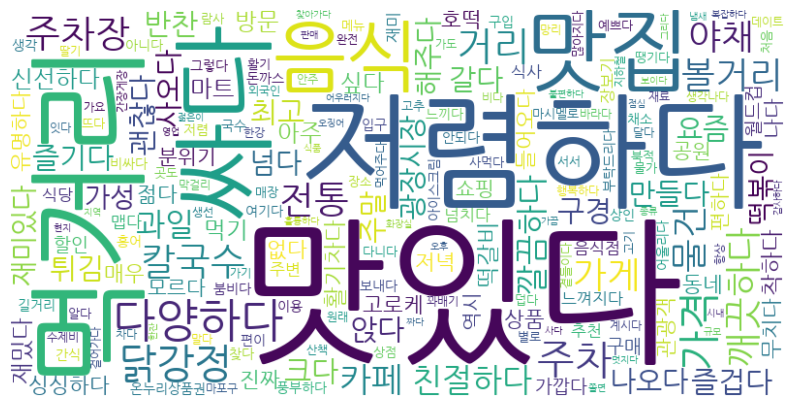

In [30]:
font_path = "C:/Users/mink5/Desktop/ÏÑùÏÇ¨Í≥ºÏ†ï/2ÌïôÍ∏∞/Îã§Î≥ÄÎüâÌÜµÍ≥ÑÎ∞©Î≤ïÎ°†/Í∏∞Îßê ÌîÑÎ°úÏ†ùÌä∏/nanum-all/ÎÇòÎàî Í∏ÄÍº¥/ÎÇòÎàîÍ≥†Îîï/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf"
all_keywords_m1 = [keyword for keywords_list in mangwon_1['content_keywords'] for keyword in keywords_list]
word_freq_m1 = Counter(all_keywords_m1) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_m1 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_m1)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_m1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
top_5_words_m1 = [word for word, _ in word_freq_m1.most_common(5)]
print(top_5_words_m1)

['ÎßõÏûàÎã§', 'Ï†ÄÎ†¥ÌïòÎã§', 'Î®πÍ±∞Î¶¨', 'Ïã∏Îã§', 'ÎßõÏßë']


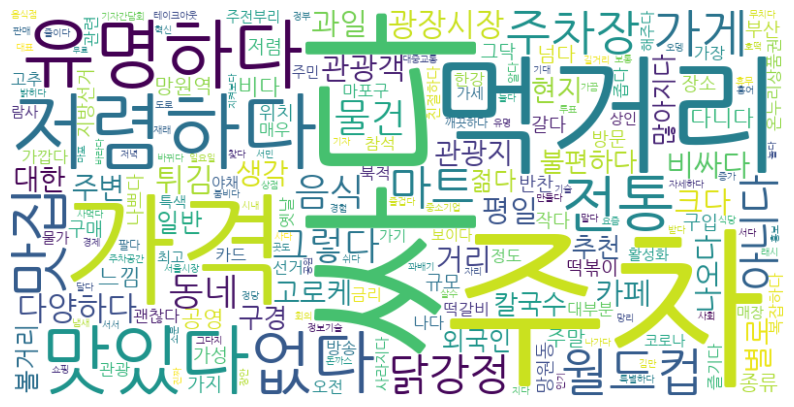

In [32]:
font_path = "C:/Users/mink5/Desktop/ÏÑùÏÇ¨Í≥ºÏ†ï/2ÌïôÍ∏∞/Îã§Î≥ÄÎüâÌÜµÍ≥ÑÎ∞©Î≤ïÎ°†/Í∏∞Îßê ÌîÑÎ°úÏ†ùÌä∏/nanum-all/ÎÇòÎàî Í∏ÄÍº¥/ÎÇòÎàîÍ≥†Îîï/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf"
all_keywords_m0 = [keyword for keywords_list in mangwon_0['content_keywords'] for keyword in keywords_list]
word_freq_m0 = Counter(all_keywords_m0) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_m0 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_m0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_m0, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
top_5_words_m0 = [word for word, _ in word_freq_m0.most_common(5)]
print(top_5_words_m0)

['Ïã∏Îã§', 'Ï£ºÏ∞®', 'Î®πÍ±∞Î¶¨', 'Í∞ÄÍ≤©', 'Ï†ÄÎ†¥ÌïòÎã§']


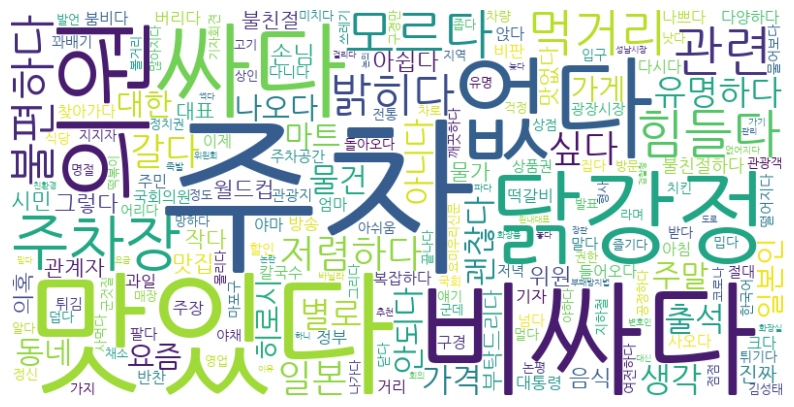

In [34]:
font_path = "C:/Users/mink5/Desktop/ÏÑùÏÇ¨Í≥ºÏ†ï/2ÌïôÍ∏∞/Îã§Î≥ÄÎüâÌÜµÍ≥ÑÎ∞©Î≤ïÎ°†/Í∏∞Îßê ÌîÑÎ°úÏ†ùÌä∏/nanum-all/ÎÇòÎàî Í∏ÄÍº¥/ÎÇòÎàîÍ≥†Îîï/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf"
all_keywords_m0 = [keyword for keywords_list in mangwon_1m['content_keywords'] for keyword in keywords_list]
word_freq_m0 = Counter(all_keywords_m0) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_m0 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_m0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_m0, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
top_5_words_m0 = [word for word, _ in word_freq_m0.most_common(5)]
print(top_5_words_m0)

['Ï£ºÏ∞®', 'ÎßõÏûàÎã§', 'ÎπÑÏã∏Îã§', 'ÏóÜÎã§', 'Ïã∏Îã§']


In [36]:
# json ÌååÏùºÎ°ú Ï†ÄÏû•
sentiment_0_key.to_json('sentiment_0_keywords_verb.json', orient='records')
sentiment_1_key.to_json('sentiment_1_keywords_verb.json', orient='records')
sentiment_1m_key.to_json('sentiment_1m_keywords_verb.json', orient='records')

### ÏûêÏñëÏãúÏû•

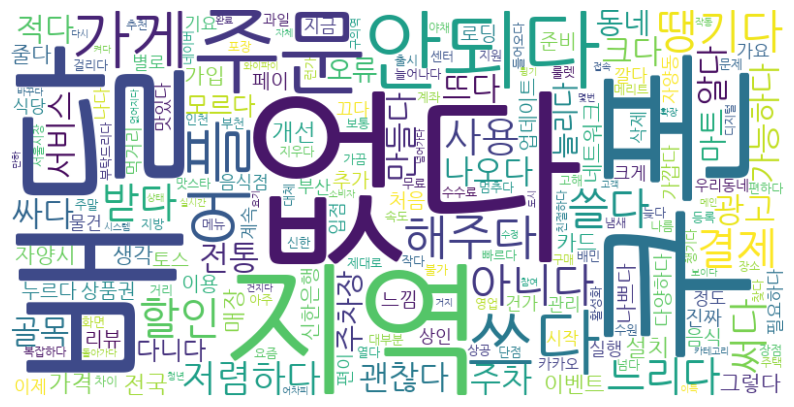

In [37]:
all_keywords_j0 = [keyword for keywords_list in jayang_0['content_keywords'] for keyword in keywords_list]
word_freq_j0 = Counter(all_keywords_j0) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_j0 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_j0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_j0, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
top_5_words_j0 = [word for word, _ in word_freq_j0.most_common(5)]
print(top_5_words_j0)

['ÏóÜÎã§', 'Î∞∞Îã¨', 'Ïø†Ìè∞', 'ÏßÄÏó≠', 'Ï£ºÎ¨∏']


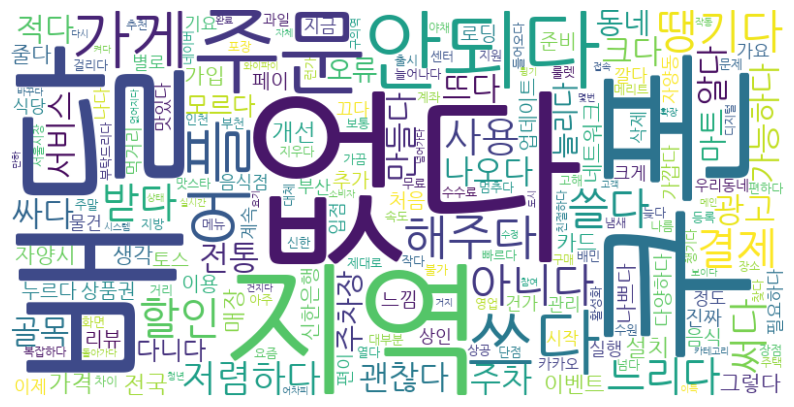

In [39]:
all_keywords_j1 = [keyword for keywords_list in jayang_1['content_keywords'] for keyword in keywords_list]
word_freq_j1 = Counter(all_keywords_j1) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_j1 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_j1)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_j0, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
top_5_words_j1 = [word for word, _ in word_freq_j1.most_common(5)]
print(top_5_words_j1)

['Ïø†Ìè∞', 'Ìï†Ïù∏', 'Ï†ÄÎ†¥ÌïòÎã§', 'ÎßõÏûàÎã§', 'Î∞∞Îã¨']


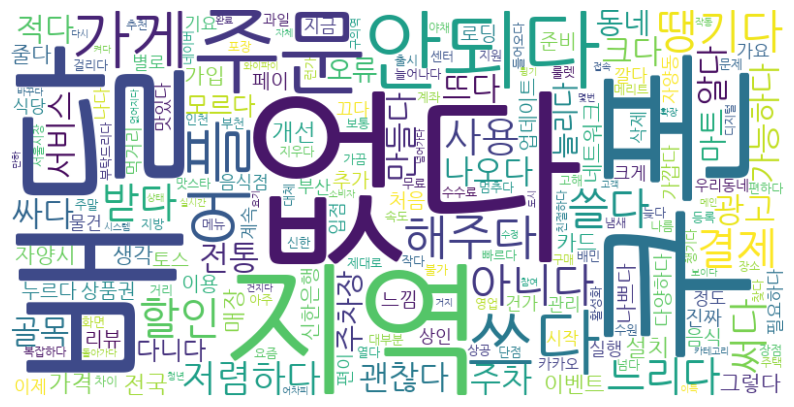

In [41]:
all_keywords_j1 = [keyword for keywords_list in jayang_1m['content_keywords'] for keyword in keywords_list]
word_freq_j1 = Counter(all_keywords_j1) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_j1 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_j1)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_j0, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
top_5_words_j1 = [word for word, _ in word_freq_j1.most_common(5)]
print(top_5_words_j1)

['ÏïàÎêòÎã§', 'Ï£ºÎ¨∏', 'Ïø†Ìè∞', 'ÏóÜÎã§', 'Îï°Í∏∞Îã§']


## 2. Î™ÖÏÇ¨ ÌÇ§ÏõåÎìúÎßå Ï∂îÏ∂ú

In [43]:
def preprocess_words_new_noun(text):
    okt = Okt()
    text = re.sub(r"[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£a-zA-Z0-9\s]", "", text)
    text = remove_emojis(text)  # remove_emojis Ìï®ÏàòÎäî Ïù¥Ï†ÑÏóê Ï†ïÏùòÎêú Ìï®ÏàòÎùºÍ≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
    text = okt.normalize(text)
    words = okt.pos(text, stem=True)
    nouns = [word[0] for word in words if word[1] == 'Noun']
    additional_stopwords = {'Ïò§Îäò', 'ÎÇ¥Ïùº','Îã§ÏùåÎÇ†','Îã§Ïùå','Î™®Î†à','Ïñ¥Ï†ú', 'Ïù¥Î≤àÏ£º', 'Îã§ÏùåÏ£º', 'Ïù¥Î≤àÎã¨', 'Ïò¨Ìï¥','Îã§ÏùåÎã¨','ÏûëÎÖÑ','ÎÇ¥ÎÖÑ',
                            'ÏòàÏ†Ñ','ÌïúÎ≤à','ÎëêÎ≤à','ÎßéÎã§','Î®πÎã§','ÎìúÎ¶¨Îã§','Ï£ºÎã§','ÏûêÏ£º','Ï¢ÖÏ¢Ö','ÏßÄÎÇòÍ∞ÄÎã§','Îì§Î¶¨Îã§',
                           'ÏãúÏû•', 'Ïû¨ÎûòÏãúÏû•', 'Ï¢ãÎã§', 'ÏÑúÏö∏', 'Îì§Ïñ¥Í∞ÄÎã§', 'Í∞ÄÎ≥¥Îã§','Í∞ÄÎã§','Í∞ÄÏïº','Ïò§Îã§','Í∑∏ÎÉ•','ÏÇ¨Îûå',
                           'Î≥¥Îã§', 'ÎßõÎ≥¥Îã§', 'Î≥¥Í≥†','ÏÇ¥Îã§','Ï†ïÎßê','Í∞ÄÎ©¥','Ïò§Î©¥','Ï∞çÎã§','Îì§Îã§','Ìï¥Î≥¥Îã§','Îã§ÎÖÄÏò§Îã§','ÏÉùÍ∏∞Îã§',
                           'Ï¢ãÏïÑÌïòÎã§','ÎßûÎã§','ÎßåÎÇòÎã§','ÎßùÏõê','ÏûêÏñë','ÎßùÏõêÏãúÏû•','ÏûêÏñëÏãúÏû•','ÏûêÎã§','ÏÑúÏö∏Ïãú','ÏúÑÌï¥','ÏïàÎÖï','ÏïàÎÖïÌïòÎã§',
                           'Î≥¥Í≥†Ïò§Îã§','ÎåÄÌï¥','ÏïåÍ≥†Ïã∂Îã§','ÎπºÎã§','Í∞ÄÏ§Ñ','ÏµúÍ∑º','ÎïåÎ¨∏','Í∑ºÏ≤ò','ÌïúÍµ≠',
                           'ÏöîÏ¶ò', 'ÏßÑÏßú', 'ÎåÄÌïú', 'Îß§Ïö∞', 'ÎùºÎ©∞', 'Í≤ÄÏ∞∞', 'Ï†ïÏπòÍ≤ÄÏ∞∞', 'Ïò§Îùº','Ìï≠ÏÉÅ','ÌïòÎãà','ÎÑàÎ¨¥',
                           'ÏÑ±ÎÇ®','Ïù¥Ïû¨Î™Ö','Ï¥ùÏû•','ÎèÖÏû¨','ÎØºÏ£ºÎãπ','Ï†ïÏπò'}
    total_stopwords = stopwords.union(additional_stopwords)
    filtered_words = [word for word in nouns if word not in total_stopwords]
    final_text = " ".join(filtered_words)
    return final_text

In [44]:
sentiment_1_key_noun = sentiment_1.copy()
sentiment_1_key_noun['content'] = sentiment_1_key_noun['content'].astype(str)
sentiment_1_key_noun['content_keywords'] = sentiment_1_key_noun['content'].apply(preprocess_words_new_noun).apply(extract_keywords)
sentiment_1_key_noun

source  market      date                       title  \
9            ÎØºÏõê    ÎßùÏõêÏãúÏû•  20221220  Í≤ΩÏÑ±Ï§ëÍ≥†ÏÇ¨Í±∞Î¶¨ Îî∞Î¶âÏù¥ ÎåÄÏó¨ÏÜå ÏÑ§Ïπò ÏöîÏ≤≠ÎìúÎ¶Ω ÎãàÎã§   
50    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220929                           0   
53    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220518                           0   
65    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20221020                           0   
68    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240310                           0   
...         ...     ...       ...                         ...   
7796      Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240316                           0   
7797      Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20231027                           0   
7798      Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20230920                           0   
7799      Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20231211                           0   
7800      Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240306                           0   

                                                content news  \
9     ÏïàÎÖïÌïòÏÑ∏Ïöî. Ï†ÄÎäî Îî∞Î¶âÏù¥Î•º Ïï†Ïö©ÌïòÎäî ÎßàÌè¨Íµ¨ÎØºÏûÖÎãàÎã§. ÏÉÅÏïîÎèôÏóêÎäî Îî∞Î¶âÏù¥ ÎåÄÏó¨ÏÜåÎ•º ÏïÑÏ£º...    0   
50    Ïï± ÏïåÎ¶ºÍ≥º Ï£ºÎ¨∏, Î∞∞Îã¨ÍπåÏßÄ Î™®Îëê ÎßåÏ°±Ïä§Îü¨Ïõ†Ïñ¥Ïöî. ÌäπÌûà Ï≤´Íµ¨Îß§, Ïû¨Íµ¨Îß§ ÌòúÌÉùÏúºÎ°ú Îßå ...    0   
53    Îü∞Ïπ≠ÌïúÏßÄ ÏñºÎßà ÏïàÎêêÎã§Í≥† ÏïÑÎäîÎç∞ Í∑∏Îü∞ Í≤É ÏπòÍ≥†Îäî Ïï± Íµ¨ÎèôÏùÄ ÏïàÏ†ïÏ†ÅÏù¥ÎÑ§Ïöî. ÎåÄÏã† Î≠ê Î≥¥...    0   
65    Ïûò ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Ïö∞ÏÑ† Ïù¥Î≤§Ìä∏ÎÇò ÌòúÌÉùÎèÑ ÎßéÍ≥† Ìï†Ïù∏Ïø†Ìè∞ÎèÑ Ïó¨Îü¨ Ïø†Ìè∞ Ï§ëÏ≤© ÏÇ¨Ïö©Í∞Ä...    0   
68    Ï¥àÍ∏∞ÏóêÎäî Í∞ÄÎßπÏ†ê ÏàòÍ∞Ä Ï†ÅÏñ¥ÏÑú ÎßéÏù¥ Ïù¥Ïö© Î™ªÌñàÏßÄÎßå ÏßÄÍ∏àÏùÄ Ïô†ÎßåÌïú ÏùåÏãùÏùÄ Îã§ ÏãúÌÇ¨ Ïàò ...    0   
...                                                 ...  ...   
7796  ÌôîÏ∞ΩÌïú Î¥ÑÍ∏∞Ïö¥ Í∞ÄÎìùÌïú ÌÜ†ÏöîÏùºÏöîÍ∏∞ÏöîÍ±∞ ÌôúÏßù Ïó¥ÏóàÏäµÎãàÎã§Î¥ÑÏù¥ ÏÑ±ÌÅº Îã§Í∞ÄÏôîÏñ¥ÏöîÏò§ÎäòÏùÄ ÏöîÍ∏∞Ïöî...    0   
7797  ÏïåÎ°ùÎã¨Î°ùÌïú Î¨¥ÏßÄÍ∞ú Í∞ôÏùÄ Îã≠Í∞ïÏ†ïÏùÑ ÌååÎäî Í≥≥Ïù¥Îã§.ÎßùÏõêÏãúÏû•Ïóê Î∞©Î¨∏ÌïòÎ©¥ Î¨¥Ï°∞Í±¥ Î∞©Î¨∏Ìï¥ÏïºÌïòÍ∏∞...    0   
7798  ÎÇòÏ≤òÎüº ÌõàÌõàÌïú ÏÇ¨ÎûåÎì§Îßå Î∞©Î¨∏Ìï¥Ïïº ÌïòÎäî Í≥≥Ïù¥ ÏûàÎã§.ÏÑúÏö∏ ÎßàÌè¨Íµ¨ ÎßùÏõêÏó≠ ÎßùÏõêÏãúÏû• Í∑ºÏ≤òÏóê...    0   
7799  ÎßùÏõêÏãúÏû• Í∞ôÏù¥ Í∞à ÏπúÍµ¨ ÌÉúÍ∑∏ !!#Ïû¨ÏäêÎû≠ÎßùÏõê #ÎßùÏõêÏãúÏû• #ÎßùÏõêÏãúÏû•Ìà¨Ïñ¥Í∑ºÏ≤ò Îì§Î•º ÏùºÏù¥...    0   
7800  ÎßùÏõêÎèô ÏóÑÏÑ†Ïûë Îç∞Ïù¥Ìä∏ ÏΩîÏä§Ïπ¥ÌéòÏôÄ ÎßõÏßë Í∑∏Î¶¨Í≥† Í∑ÄÏó¨Ïö¥ ÏÜåÌíàÏÉµÍπåÏßÄ!!ÏóÑÏÑ†Ìï¥ÏÑú ÎΩëÏïòÏúºÎãà ...    0   

                                               hashtags revisit reply  \
9                                                     0       0     0   
50                                                    0       0     0   
53                                                    0       0     0   
65                                                    0       0     0   
68                                                    0       0     0   
...                                                 ...     ...   ...   
7796  [#ÎßùÏõêÏãúÏû•, #ÎßùÏõêÎèôÎßõÏßë, #ÎπÑÍ±¥Í∑∏Î¶≠ÏöîÍ±∞Ìä∏ÎßõÏßë, #Í∑∏Î¶≠ÏöîÍ±∞Ìä∏ÎßõÏßë, #ÎßùÎ¶¨Îã®Í∏∏ÎßõÏßë,...       0     0   
7797   [#ÎßùÏõêÎèôÎßõÏßë, #ÎßùÏõêÏãúÏû•, #ÎßàÌè¨Íµ¨ÎßõÏßë, #ÎßùÏõêÏó≠ÎßõÏßë, #Îã≠Í∞ïÏ†ïÎßõÏßë, #ÎßùÏõêÏãúÏû•ÎßõÏßë]       0     0   
7798                        [#ÌõàÌõàÌò∏Îñ°, #Î®πÏÑ∏Í∂å_ÎßàÌè¨Íµ¨, #Î®πÏÑ∏Í∂å_ÎßùÏõêÏó≠]       0     0   
7799  [#Ïû¨ÏäêÎû≠_ÎßùÏõê, #ÎßùÏõêÏãúÏû•, #ÎßùÏõêÏãúÏû•Ìà¨Ïñ¥, #Ïö∞Ïù¥ÎùΩ, #Ïû¨ÏäêÎû≠Í∞ÄÏù¥Îìú, #Ïû¨ÏäêÎû≠,...       0     0   
7800  [#ÎßùÏõêÎèôÎç∞Ïù¥Ìä∏, #ÎßùÏõêÎèôÏÜåÌíàÏÉµ, #ÎßùÏõêÏãúÏû•, #ÎßùÎ¶¨Îã®Í∏∏ÏÜåÌíàÏÉµ, #ÎßùÎ¶¨Îã®Í∏∏Ïπ¥Ìéò, #...       0     0   

      sentiment  content_length         content_keywords  
9             1             579    [Î∂ÅÎ°ú, Î¨∏Ïùò, Íµ¨ÎØº, Ï†ÑÌòÄ, Îî∞Î¶âÏù¥]  
50            1             222    [ÏÇ¨Ìï≠, Ï£ºÎ¨∏, ÎßõÏä§ÌÉÄ, ÏòàÏÉÅ, ÏïåÎ¶º]  
53            1             159   [Îü∞Ïπ≠Ìïú, Î≤ÑÎ≤ÖÏù¥, Í∑∏Í±∞, ÌôîÎ©¥, Ï†êÏ£º]  
65            1             208     [Ìï†Ïù∏, Ïø†Ìè∞, ÌòúÌÉ

In [45]:
sentiment_0_key_noun = sentiment_0.copy()
sentiment_0_key_noun['content'] = sentiment_0_key_noun['content'].astype(str)
sentiment_0_key_noun['content_keywords'] = sentiment_0_key_noun['content'].apply(preprocess_words_new_noun).apply(extract_keywords)
sentiment_0_key_noun

source  market      date  \
2        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20200622   
5        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20230814   
6        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20230801   
7        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20230723   
8        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20230627   
...     ...     ...       ...   
7760  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240125   
7762  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240129   
7768  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240226   
7782  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240316   
7785  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240313   

                                                  title  \
2                                          Ï≤≠ÎÖÑÎ™∞ÏùÑ Ï°∞ÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî!   
5                ÎßùÏõêÏãúÏû•Ïùò Ïù¥ÏÉÅÌïú ÏòÅÏñ¥ Í∞ÑÌåê - harmony and pleasant   
6                      Ïù¥ÏÉÅÌïú ÎßùÏõêÎ°úÏùò ÎßùÏõêÏãúÏû•-ÏõîÎìúÏªµÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÍ∞Ñ Ìö°Îã®Î≥¥ÎèÑ 2   
7                        Ïù¥ÏÉÅÌïú ÎßùÏõêÎ°úÏùò ÎßùÏõêÏãúÏû•-ÏõîÎìúÏªµÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÍ∞Ñ Ìö°Îã®Î≥¥ÎèÑ   
8                                    ÎßùÏõêÎèô ÏãúÏû•Í±∞Î¶¨ Î∞úÏ†ÑÏùÑ ÏúÑÌïú Ï†úÏñ∏   
...                                                 ...   
7760                     2228ÏàòÌçºÎ∞îÏù¥Ï†Ä ÏßÄÏó≠ÏÉÅÍ∂å ÌôúÏÑ±Ìôî ÌñâÏÇ¨ ÏàòÌçºÎ∞îÏù¥Ï†Ä Î™®Ïßë   
7762                 Í¥ëÏßÑÏª§Ìäº ÏûêÏñëÎèôÏª§Ìäº Ï∞®Î•¥Î•¥ Î∏îÎùºÏù∏Îìú ÌôîÏù¥Ìä∏Ïù∏ÌÖåÎ¶¨Ïñ¥ Î∞©Î¨∏Ï∂úÏû•ÏÑ§Ïπò   
7768  ÌôîÏñëÎèô 371Î≤àÏßÄ ÏùºÏõê Í±¥ÎåÄÏó≠ Î™®ÏïÑÌÉÄÏö¥ ÌôçÎ≥¥Í¥ÄÏóêÏÑú ÎèôÏùòÏÑú ÏßïÍµ¨ÏãúÏûëÌïúÎã§ÎÑ§Ïöî .. Ïï†Í≤¨...   
7782                                                  0   
7785                                                  0   

                                                content news  \
2     Ï≤≠ÎÖÑ Ïã§ÏóÖÎ¨∏Ï†úÏôÄ Ï†ÑÌÜµÏãúÏû• Î∂ÄÌù•ÏùÑ ÏúÑÌï¥ ÌôîÏñëÏãúÏû• ÌòπÏùÄ ÏûêÏñëÏ†ÑÌÜµÏãúÏû•Ïóê Ï≤≠ÎÖÑÎ™∞ÏùÑ Ï°∞ÏÑ±Ìï¥Ï£º...    0   
5     Ï£ºÎßêÏóê ÎßùÏõêÏãúÏû•Ïóê Í∞îÎã§Í∞Ä ÎßùÏõêÏãúÏû•Í≥º ÏõîÎìúÏªµÏãúÏû• ÏÇ¨Ïù¥ ÎèÑÎ°úÎ≥ÄÏóê Î∂ôÏñ¥ ÏûàÎäî Ï≤®Î∂ÄÌïú ÎßùÏõê...    0   
6     ÏÉàÏò¨ Ï†ÑÏûêÎØºÏõêÏ∞ΩÍµ¨Í∞Ä Ïù¥ÏÉÅÌïòÏó¨ Ïù¥ÏÜ°Ìïú ÎØºÏõêÏùÄ ÎèôÏùºÎØºÏõêÏúºÎ°ú ÏÑ†ÌÉùÌï† Ïàò ÏóÜÏñ¥ÏÑú Ïù¥Ï†Ñ ÎØºÏõê...    0   
7     ÎßùÏõêÎ°úÏùò ÎßùÏõêÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÏôÄ ÏõîÎìúÏªµÏãúÏû• ÏïÑÏºÄÏù¥ÎìúÍ∞ÑÏóê Ìö°Îã®Î≥¥ÎèÑÍ∞Ä Ï≤®Î∂ÄÏôÄ Í∞ôÏù¥ Ïù¥ÏÉÅÌïòÍ≤å...    0   
8     ÎßùÏõêÎèôÏùÄ ÏµúÍ∑º MZÏÑ∏ÎåÄÎì§ÏóêÍ≤å Ìï´ÌîåÎ†àÏù¥Ïä§Î°ú Í∏âÎ∂ÄÏÉÅÌïòÍ≥† ÏûàÎäî ÏßÄÏó≠ÏûÖÎãàÎã§. ÏÑ±Ïàò, Ïó∞ÎÇ®,...    0   
...                                                 ...  ...   
7760  ÏßÄÏó≠ÏÉÅÍ∂å ÌôúÏÑ±Ìôî ÌîÑÎ°úÏ†ùÌä∏ ÏàòÌçºÎ∞îÏù¥Ï†Ä Î™®Ïßë ÏïàÎÇ¥ 2Ïõî 02Ïùº08ÏùºÍπåÏßÄ ÏßÑÌñâÎêòÎäî ÏßÄÏó≠Ïãú...    0   
7762   Í¥ëÏßÑÏª§Ìäº ÏûêÏñëÎèôÏª§Ìäº Ï∞®Î•¥Î•¥ Î∏îÎùºÏù∏Îìú ÌôîÏù¥Ìä∏Ïù∏ÌÖåÎ¶¨Ïñ¥ Î∞©Î¨∏Ï∂úÏû•ÏÑ§Ïπò Í¥ëÏßÑÍµ¨ Ïª§Ìäº Ï§ëÍ≥°Îèô...    0   
7768  ÏûêÏñë4Îèô Î™®ÏïÑÌÉÄÏö¥Ïù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï°∞Ìï©ÏÑ§Î¶ΩÏùÑ ÏúÑÌïú Ï∞ΩÎ¶ΩÏ¥ùÌöåÍ∞Ä ÌÜµÍ≥ºÎèºÍ≥† ÎÇòÎãà ÏûêÏñë1Îèô 2...    0   
7782  .. Ï°∞Í∏à Î©ÄÎ¶¨ Î®πÏñ¥ Î≥¥ÏïòÎã§  ÏïÑÏù¥Ïä§Í∞Ä Îì§Ïñ¥Í∞Ñ ÎßàÏãúÎ©úÎ°ú  Ï£ºÎ¨∏ÌïòÎ©¥ Í∑∏ ÏûêÎ¶¨ÏóêÏÑú Íµ¨Ïõå...    0   
7785  #ÏΩòÏõ∞  ÏÑúÏö∏ ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ°ú15Í∏∏ 40 2Ï∏µ ÏΩòÏõ∞Ïª§Ìîº12002200Ìú¥Î¨¥ ÎßùÏõêÏó≠ 2Î≤àÏ∂úÍµ¨    0   

                                           hashtags revisit  \
2                                                 0       0   
5                                                 0       0   
6                                                 0       0   
7                                                 0       0   
8                                                 0       0   
...                                             ...     ...   
7760                                              0       0   
7762                                              0       0   
7768                                              0       0   
7782  [#ÎßùÏõêÏãúÏû•, #ÎßåÏõêÏãúÏû•, #ÌïúÍµ≠Ïó¨Ìñâ, #ÌïúÍµ≠Ïó¨Ìñâ, #ÎßàÏãúÎ©úÎ°úÏïÑÏù¥Ïä§, #ÌïúÍµ≠ÏùåÏãù]       0   
7785                                          [#ÏΩòÏõ∞]       0   

                                                  reply  sentiment  \
2                                                     0          

In [46]:
sentiment_1m_key_noun = sentiment_1_.copy()
sentiment_1m_key_noun['content'] = sentiment_1m_key_noun['content'].astype(str)
sentiment_1m_key_noun['content_keywords'] = sentiment_1m_key_noun['content'].apply(preprocess_words_new_noun).apply(extract_keywords)
sentiment_1m_key_noun

source  market      date                                      title  \
0        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220608                         ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®Ïû•Ïùò ÏïàÏùºÌïú Ïö¥ÏòÅ   
1        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20210312                                 ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®Ïû•   
3        ÎØºÏõê  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20200520                    ÏûêÏñë 1Îèô ÏÉàÎ≤Ω ÎèÑÎ°úÍ≥µÏÇ¨ ÎØºÏõê Ïã†Ï≤≠Ìï©ÎãàÎã§.   
4        ÎØºÏõê    ÎßùÏõêÏãúÏû•  20231012  ÎßùÏõêÏãúÏû• Í≥µÏòÅÏ£ºÏ∞®Ïû• Î∂ÄÎãπÏù¥ÎìùÏùÄ 1ÎÖÑÎÑòÍ≤å Î∞©ÏπòÌïòÍ≥† Ï£ºÏ∞®ÏöîÍ∏àÏùÄ 50ÌçºÏÑºÌä∏ Ïù∏ÏÉÅ   
10       ÎØºÏõê    ÎßùÏõêÏãúÏû•  20220515                       ÏãùÌíà ÏúÑÏÉùÎ≤ï ÏúÑÎ∞òÌïú ÏóÖÏ≤¥ Í≥†Î∞úÌï©ÎãàÎã§.   
...     ...     ...       ...                                        ...   
7759  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240113                                Íµ¨ÌîºÏÇ¨ÎûëÏªµ Î¶¥Î†àÏù¥#8   
7764  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240205        Ï†ÅÏ§ë!!!  ÏûêÏñëÍ≥®Î™©ÏãúÏû• Ï£ºÎ≥Ä ÎÖ∏ÌõÑÏ£ºÍ±∞ÏßÄft. 2040 Í¥ëÏßÑÌîåÎûú   
7765  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240211                                  Ï°∞ÏñëÎßàÌä∏ Ï≤´Î∞©Î¨∏Í∏∞   
7770  ÎÑ§Ïù¥Î≤ÑÏπ¥Ìéò  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240302                           ÏûêÏñëÏ†ÑÌÜµÏãúÏû•Ïóê Ïû•Î≥¥Îü¨ ÏôîÏñ¥Ïöî    
7789  Ïù∏Ïä§ÌÉÄÍ∑∏Îû®    ÎßùÏõêÏãúÏû•  20240316                                          0   

                                                content news  \
0     Ï†ÄÎäî 2022ÎÖÑ 5Ïõî 24Ïùº 13Ïãú 7Î∂Ñ ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ïù¥Ïö©ÏùÑ ÏúÑÌï¥ ÏûêÏñëÏ†ÑÌÜµÏãúÏû• Ï£ºÏ∞®...    0   
1     ÏïàÎÖïÌïòÏã≠ÎãàÍπå Îã¥ÎãπÏûêÎãò ÏûêÏñëÏ†ÑÌÜµÏãúÏû•ÏùÑ ÏûêÏ£º Ïù¥Ïö©ÌïòÎäîÎç∞ Ïù¥Î≤àÏóê Ï£ºÏ∞®Ïû•ÏùÑ Ïù¥Ïö©ÌïòÎ©¥ÏÑú Î∂àÌé∏...    0   
3     ÏïàÎÖïÌïòÏÑ∏Ïöî. ÏûêÏñë 1Îèô Ï£ºÎØºÏûÖÎãàÎã§. ÏµúÍ∑º ÏûêÏñëÏ†ÑÌÜµÏãúÏû•ÏúºÎ°ú ÏßÑÏûÖÌïòÎäî Í≥®Î™©Ïùò ÎèÑÎ°úÎ•º Í≥µ...    0   
4     Ï≤®Î∂ÄÏôÄ Í∞ôÏù¥ 2022ÎÖÑ 06Ïõî 18Ïùº ÎßùÏõêÏãúÏû• Í≥µÏòÅÏ£ºÏ∞®Ïû•Ïùò ÏãúÏû•Ìï†Ïù∏ Ï†úÎèÑÏùò Î∂àÌï©Î¶¨Ìïú...    0   
10    Î≥∏Ïù∏ÏùÄ Í∏ÄÏùÑ Ïò¨Î¶¨Îäî Í∏àÏùº ÎßàÌè¨Íµ¨ ÎßùÏõêÏãúÏû•Ïóê ÏûàÎäî ÎØºÏòÅÌôúÏñ¥ÌöüÏßëÏóêÏÑú Ïµ∏Î∞•ÏùÑ ÏÉÄÍ≥† Í∞ÑÏû•Í≥º...    0   
...                                                 ...  ...   
7759  Ïª§Ìîº Î®∏Ïã†Ïù¥ ÏàòÎèôÏù∏Îç∞Îã§ ÌïúÎëêÏûî ÎΩëÍ∏∞ÏóêÎäî Ï§ÄÎπÑÍ≥ºÏ†ïÏù¥ Ï¢Ä ÏûàÏñ¥ÏÑú  Ìï∏Îìú ÎìúÎ¶ΩÏúºÎ°ú ÎÇ¥Î†§ ...    0   
7764  Îä¶ÏóàÏäµÎãàÎã§! 2040 Í¥ëÏßÑÌîåÎûú ÏÑ§Î™ÖÌöåÎ•º ÏßÄÍµ¨Î∂àÏãúÏ∞©ÎãòÍ≥º ÏöîÏ†ïÏùòÏöîÏ†ïÎãòÍªòÏÑú Îã§ÎÖÄÏò§Ïã†ÏßÄÎèÑ ...    0   
7765  ÌèâÏÜå ÎèôÏÑ†ÏÉÅ ÏßÄÎÇòÍ∞à ÏùºÏù¥ ÏóÜÏñ¥ ÏßÅÏ†ëÎ∞©Î¨∏ÏùÄ Î™ªÌïòÍ≥†, Ïù∏Ïä§ÌÉÄ ÌîºÎìúÎÇò Î∏îÎ°úÍ∑∏ Í∏ÄÎ°úÎßå Î≥¥Îçò...    0   
7770   2Î≤àÏß∏ Îã®ÌñâÎ≥∏ "ÏàòÎèÑÍ∂åÎπÑÏ£ºÌÉù Ìà¨Ïûê ÏàòÏóÖ" Ï∂úÍ∞ÑÎêòÏóàÏäµÎãàÎã§   Íµ¨Îß§Î∞©Î≤ï Í≥µÏßÄ  htt...    0   
7789  #Ïñ¥Í∏ÄÎ¶¨Î≤†Ïù¥Ïª§Î¶¨ #ÎßàÌè¨ #ÎßàÌè¨ÎßõÏßë #ÎßùÏõêÎèô #ÎßùÏõêÏãúÏû• #Ïù¥Î¶ÑÏù¥Ïñ¥Î†§Ïõå #Íµ¨Ìô©ÏûëÎ¨ºÎçïÌõÑ ...    0   

                                               hashtags revisit  \
0                                                     0       0   
1                                                     0       0   
3                                                     0       0   
4                                                     0       0   
10                                                    0       0   
...                                                 ...     ...   
7759                                                  0       0   
7764                                                  0       0   
7765                                                  0       0   
7770                                                  0       0   
7789  [#Ïñ¥Í∏ÄÎ¶¨Î≤†Ïù¥Ïª§Î¶¨, #ÎßàÌè¨, #ÎßàÌè¨ÎßõÏßë, #ÎßùÏõêÎèô, #ÎßùÏõêÏãúÏû•, #Ïù¥Î¶ÑÏù¥Ïñ¥Î†§Ïõå, #...       0   

                                                  reply  sentiment  \
0                                                     0         -1   
1                                                     0         -1   
3                                                     0         -1   
4                                                     0         -1   
10                  

In [47]:
# json ÌååÏùºÎ°ú Ï†ÄÏû•
sentiment_0_key_noun.to_json('sentiment_new_0_keywords_noun.json', orient='records')
sentiment_1_key_noun.to_json('sentiment_new_1_keywords_noun.json', orient='records')
sentiment_1m_key_noun.to_json('sentiment_new_1m_keywords_noun.json', orient='records')

In [48]:
mangwon_0n = sentiment_0_key_noun[sentiment_0_key_noun['market']=='ÎßùÏõêÏãúÏû•']
jayang_0n = sentiment_0_key_noun[sentiment_0_key_noun['market']=='ÏûêÏñëÏ†ÑÌÜµÏãúÏû•']

mangwon_1n = sentiment_1_key_noun[sentiment_1_key_noun['market']=='ÎßùÏõêÏãúÏû•']
jayang_1n = sentiment_1_key_noun[sentiment_1_key_noun['market']=='ÏûêÏñëÏ†ÑÌÜµÏãúÏû•']

mangwon_1nm = sentiment_1m_key_noun[sentiment_1m_key_noun['market']=='ÎßùÏõêÏãúÏû•']
jayang_1nm = sentiment_1m_key_noun[sentiment_1m_key_noun['market']=='ÏûêÏñëÏ†ÑÌÜµÏãúÏû•']

### ÎßùÏõêÏãúÏû•

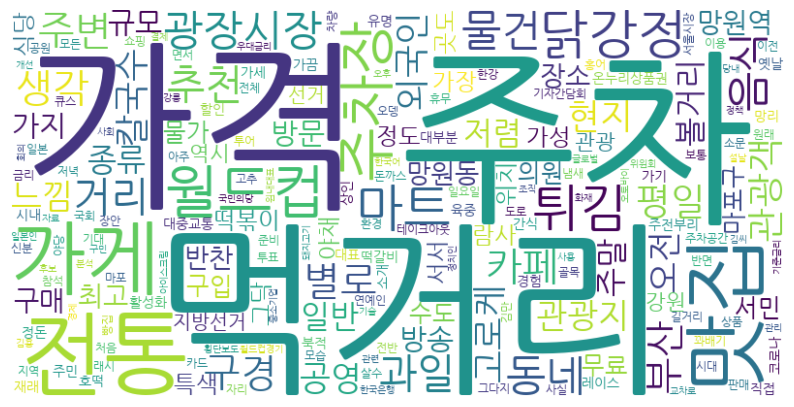

In [49]:
all_keywords_m0 = [keyword for keywords_list in mangwon_0n['content_keywords'] for keyword in keywords_list]
word_freq_m0 = Counter(all_keywords_m0) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_m0 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_m0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_m0, interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
top_5_words_m0 = [word for word, _ in word_freq_m0.most_common(5)]
print(top_5_words_m0)

['Ï£ºÏ∞®', 'Î®πÍ±∞Î¶¨', 'Í∞ÄÍ≤©', 'Ï†ÑÌÜµ', 'ÎßõÏßë']


In [51]:
all_keywords_m1 = [keyword for keywords_list in mangwon_1n['content_keywords'] for keyword in keywords_list]
word_freq_m1 = Counter(all_keywords_m1) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_m1 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_m1)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_m1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
top_5_words_m1 = [word for word, _ in word_freq_m1.most_common(5)]
print(top_5_words_m1)

['Î®πÍ±∞Î¶¨', 'ÎßõÏßë', 'Í∞ÄÍ≤©', 'ÏùåÏãù', 'ÏπºÍµ≠Ïàò']


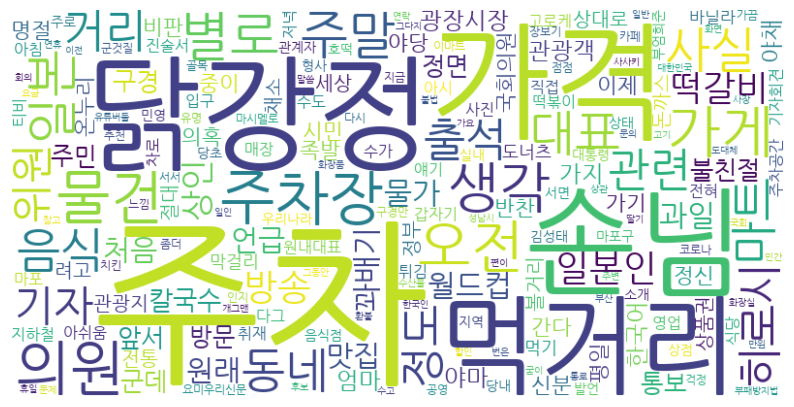

In [53]:
all_keywords_m1 = [keyword for keywords_list in mangwon_1nm['content_keywords'] for keyword in keywords_list]
word_freq_m1 = Counter(all_keywords_m1) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_m1 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_m1)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_m1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
top_5_words_m1 = [word for word, _ in word_freq_m1.most_common(5)]
print(top_5_words_m1)

['Ï£ºÏ∞®', 'Í∞ÄÍ≤©', 'Îã≠Í∞ïÏ†ï', 'ÏÜêÎãò', 'Î®πÍ±∞Î¶¨']


### ÏûêÏñëÏãúÏû•

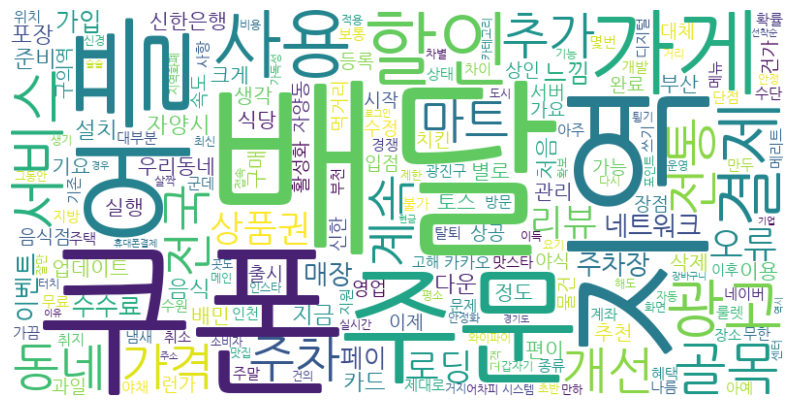

In [55]:
all_keywords_j0 = [keyword for keywords_list in jayang_0n['content_keywords'] for keyword in keywords_list]
word_freq_j0 = Counter(all_keywords_j0) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_j0 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_j0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_j0, interpolation='bilinear')
plt.axis('off')
plt.show()

In [56]:
top_5_words_j0 = [word for word, _ in word_freq_j0.most_common(5)]
print(top_5_words_j0)

['Î∞∞Îã¨', 'Ïø†Ìè∞', 'ÏßÄÏó≠', 'Ï£ºÎ¨∏', 'Ïñ¥Ìîå']


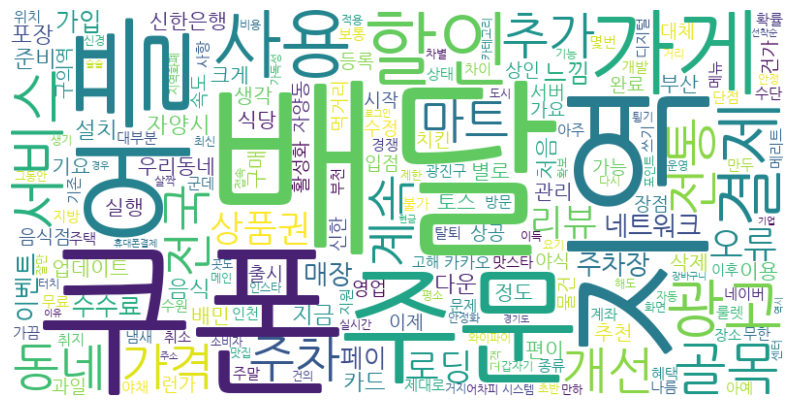

In [57]:
all_keywords_j1 = [keyword for keywords_list in jayang_1n['content_keywords'] for keyword in keywords_list]
word_freq_j1 = Counter(all_keywords_j1) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_j1 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_j1)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_j0, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
top_5_words_j1 = [word for word, _ in word_freq_j1.most_common(5)]
print(top_5_words_j1)

['Ìï†Ïù∏', 'Ïø†Ìè∞', 'Î∞∞Îã¨', 'Ï£ºÎ¨∏', 'Íµ¨ÏùòÏó≠']


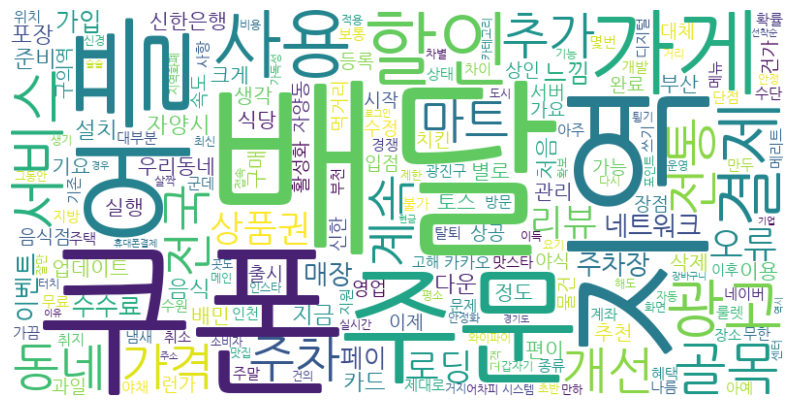

In [59]:
all_keywords_j1 = [keyword for keywords_list in jayang_1nm['content_keywords'] for keyword in keywords_list]
word_freq_j1 = Counter(all_keywords_j1) # ÎπàÎèÑÏàò Í≥ÑÏÇ∞
wordcloud_j1 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_j1)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_j0, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
top_5_words_j1 = [word for word, _ in word_freq_j1.most_common(5)]
print(top_5_words_j1)

['Ï£ºÎ¨∏', 'Ïø†Ìè∞', 'Ïñ¥Ìîå', 'Î∞∞Îã¨', 'Í∞ÄÍ≤å']


### Î∂ÄÏ†ï Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 'Î∞∞Îã¨' Îã®Ïñ¥ Îì§Ïñ¥Í∞Ñ ÎÇ¥Ïö© ÌôïÏù∏

In [61]:
sentiment_0[(sentiment_0['content'].str.contains('Î∞∞Îã¨'))&(sentiment_0['market']=='ÏûêÏñëÏ†ÑÌÜµÏãúÏû•')]

source  market      date                          title  \
77    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240206                              0   
120   Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20231021                              0   
121   Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20230925                              0   
201   Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20230804                              0   
228   Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240312                              0   
...         ...     ...       ...                            ...   
2246  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20221121                              0   
2355  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220909                              0   
2448  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20230709                              0   
2481  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220831                              0   
6997     ÎÑ§Ïù¥Î≤ÑÎ∏îÎ°úÍ∑∏  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20231111   ÏÑúÏö∏ÌïúÏö∞ÏÑ†Î¨ºÏÑ∏Ìä∏Î•º ÌåêÎß§ÌïòÎäî ÏûêÏñëÏãúÏû•Ï†ïÏú°Ï†ê Ï∞©ÌïúÏ†ïÏú°Ï†ê   

                                                content news hashtags revisit  \
77    Ïûò Ïì∞Í≥† ÏûàÏäµÎãàÎã§Îßå, ÏßÄÏó≠ÏÇ¨ÎûëÏÉÅÌíàÍ∂å ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïñ¥Ìîå Ï§ë Ï†úÏùº Ï¢ãÏùÄ Ï†êÏù¥ Ïû•Ï†êÏù∏Îç∞ ...    0        0       0   
120   Í∞ôÏùÄ ÎπÑÏö©ÏùÑ ÎÇ¥ÎèÑ Î∞∞Îã¨Ïù¥ ÌÉÄÏï±ÏúºÎ°ú Ï£ºÎ¨∏ÌïòÎäîÍ≤ÉÎ≥¥Îã§ ÎäêÎ¶º. Í≥†Í∞ùÏÑºÌÑ∞Îäî Ïã§ÏãúÍ∞ÑÏúºÎ°ú ÎèÑÏõÄÎ∞õ...    0        0       0   
121   Ïù¥ ÎÜÄÎùºÏö¥ Î∞∞Îã¨ Ïñ¥ÌîåÏùÄ Î©îÎâ¥Î•º Í≥†Î•¥Î©¥ Î∞∞Îã¨Í∞ÄÎä• ÏßÄÏó≠Ïù¥ ÏïÑÎãàÎùºÎäî ÎßêÎßå ÎÇòÏò®Îã§. Ïù¥Îü¥Í±∞...    0        0       0   
201   ÏÑúÏö∏Í≤ΩÍ∏∞Î•º Ï†úÏô∏ÌïòÍ≥† ÌÅ∞ ÎèÑÏãúÎäî ÍΩ§ ÏÇ¨Ïö©Ìï†Îßå Ïñ¥ÌîåÏù¥ÎùºÍ≥† Î≥¥ÎäîÎç∞ ÏßÄÎ∞©Ïùò ÏÜåÎèÑÏãú ÌùîÌûà Ïãú...    0        0       0   
228                             Î∞∞Îã¨ Í∞ÄÎä• ÏßÄÏó≠ ÏïÑÎãàÍ±∞ÎÇò ÏûÖÏ†ê Í∞ÄÍ≤åÍ∞Ä ÏóÜÏùå    0        0       0   
...                                                 ...  ...      ...     ...   
2246                                   ÏÉàÎ≤Ω Î∞∞Îã¨ÏùÄ Ïñ∏Ï†úÏØ§Î∂ÄÌÑ∞ Îê†ÍπåÏöî    0        0       0   
2355                                      ÏïÑÎãà ÏßÄÎ∞©ÏùÄÎ≠ê Î∞∞Îã¨ÏóÜÏùå     0        0       0   
2448                                   ÏÑ±ÎèôÍµ¨ ÏÑ±ÏàòÎèôÏóêÏÑú Î∞∞Îã¨ ÎêòÎÇòÏöî    0        0       0   
2481                                          Í∞úÏÇ¨Í∏∞Î∞∞Îã¨Î£åÎ∞õÏïÑÏöî    0        0       0   
6997  ÏïàÎÖïÌïòÏÑ∏ÏöîÏò§Îäò ÏÜåÍ∞úÎìúÎ¶¥ Í≥≥ÏùÄÏÑúÏö∏ÌïúÏö∞ÏÑ†Î¨ºÏÑ∏Ìä∏Î•º ÌåêÎß§ÌïòÎäîÏûêÏñëÏãúÏû•Ï†êÏú°Ï†ê Ï∞©ÌïúÏ†ïÏú°Ï†êÏûÖÎãàÎã§Ïûê...    0        0       0   

     reply  sentiment  content_length  
77       0          0              84  
120      0          0              50  
121      0          0             109  
201      0          0             191  
228      0          0              23  
...    ...        ...             ...  
2246     0          0              16  
2355     0          0              13  
2448     0          0              16  
2481     0          0               9  
6997     0          0            1147  

[62 rows x 11 columns]

In [62]:
data_new[data_new['source']=='Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞']

source  market      date title  \
41    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240213     0   
42    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220101     0   
43    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220831     0   
44    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240213     0   
45    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220101     0   
...         ...     ...       ...   ...   
2598  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220807     0   
2599  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220724     0   
2600  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20211222     0   
2601  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220807     0   
2602  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220724     0   

                                                content news hashtags revisit  \
41    ÏÑúÏö∏Îßå ÏãúÌñâÌï†Îïå Ï¥àÏ∞ΩÍ∏∞Î∂ÄÌÑ∞ Ïù¥Ïö©ÌñàÎäîÎç∞ ÌòÑÏû¨Îäî Ïã†ÌïúÏùÄÌñâ ÎπÑÏù¥Ïö© Í≥†Í∞ùÏùÄ ÌäπÌûà ÌòúÌÉù Î≥ÑÎ°ú...    0        0       0   
42    Ïò§ÌîàÌïúÏßÄ ÏñºÎßà Ïïà ÎêúÍ±∞ ÏπòÍ≥†Îäî ÏïàÏ†ïÏ†ÅÏûÖÎãàÎã§. Ïã§ÏÇ¨Ïö©ÏûêÎ°úÏÑú ÌïúÍ∞ÄÏßÄ Î∂àÌé∏Ìïú Ï†êÏùÄ ÌïúÏãù,...    0        0       0   
43    Ïª®ÏÖâÏù¥ÎÇò ÏΩòÌÖêÏ∏†Îäî ÎÇòÏÅòÏßÄ ÏïäÏùÄÎç∞ Ïñ¥ÌîåÏùò ÏÇ¨Ïö©Í∞êÏù¥ Î≥ÑÎ°≠ÎãàÎã§. ÏÇ¨Ïö©ÌïòÎäî ÌùêÎ¶ÑÏù¥ ÎöùÎöù ÎÅä...    0        0       0   
44    ÏÑúÏö∏Îßå ÏãúÌñâÌï†Îïå Ï¥àÏ∞ΩÍ∏∞Î∂ÄÌÑ∞ Ïù¥Ïö©ÌñàÎäîÎç∞ ÌòÑÏû¨Îäî Ïã†ÌïúÏùÄÌñâ ÎπÑÏù¥Ïö© Í≥†Í∞ùÏùÄ ÌäπÌûà ÌòúÌÉù Î≥ÑÎ°ú...    0        0       0   
45    Ïò§ÌîàÌïúÏßÄ ÏñºÎßà Ïïà ÎêúÍ±∞ ÏπòÍ≥†Îäî ÏïàÏ†ïÏ†ÅÏûÖÎãàÎã§. Ïã§ÏÇ¨Ïö©ÏûêÎ°úÏÑú ÌïúÍ∞ÄÏßÄ Î∂àÌé∏Ìïú Ï†êÏùÄ ÌïúÏãù,...    0        0       0   
...                                                 ...  ...      ...     ...   
2598                                                ÎÖ∏Î¨¥ÌòÑ    0        0       0   
2599                                                Ïì∞Î†àÍ∏∞    0        0       0   
2600                                               Îï°ÍπÅÏãúÎã§    0        0       0   
2601                                               Îï°ÍπÅÎãàÎã§    0        0       0   
2602                              Nothing to be desired    0        0       0   

     reply  sentiment  content_length  
41       0         -1             318  
42       0         -1             363  
43       0         -1             271  
44       0         -1             318  
45       0         -1             363  
...    ...        ...             ...  
2598     0         -1               3  
2599     0         -1               3  
2600     0          1               4  
2601     0          1               4  
2602     0          0              21  

[2562 rows x 11 columns]

In [63]:
duplicate_rows = data_new[data_new['source'] == 'Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞'].duplicated(keep=False)
data_new[data_new['source'] == 'Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞'][duplicate_rows]

source  market      date title  \
41    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240213     0   
42    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220101     0   
43    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220831     0   
44    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240213     0   
45    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220101     0   
46    Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20220831     0   
2496  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240306     0   
2586  Í¥ëÏßÑÎï°Í≤®ÏöîÏñ¥ÌîåÎ¶¨Î∑∞  ÏûêÏñëÏ†ÑÌÜµÏãúÏû•  20240306     0   

                                                content news hashtags revisit  \
41    ÏÑúÏö∏Îßå ÏãúÌñâÌï†Îïå Ï¥àÏ∞ΩÍ∏∞Î∂ÄÌÑ∞ Ïù¥Ïö©ÌñàÎäîÎç∞ ÌòÑÏû¨Îäî Ïã†ÌïúÏùÄÌñâ ÎπÑÏù¥Ïö© Í≥†Í∞ùÏùÄ ÌäπÌûà ÌòúÌÉù Î≥ÑÎ°ú...    0        0       0   
42    Ïò§ÌîàÌïúÏßÄ ÏñºÎßà Ïïà ÎêúÍ±∞ ÏπòÍ≥†Îäî ÏïàÏ†ïÏ†ÅÏûÖÎãàÎã§. Ïã§ÏÇ¨Ïö©ÏûêÎ°úÏÑú ÌïúÍ∞ÄÏßÄ Î∂àÌé∏Ìïú Ï†êÏùÄ ÌïúÏãù,...    0        0       0   
43    Ïª®ÏÖâÏù¥ÎÇò ÏΩòÌÖêÏ∏†Îäî ÎÇòÏÅòÏßÄ ÏïäÏùÄÎç∞ Ïñ¥ÌîåÏùò ÏÇ¨Ïö©Í∞êÏù¥ Î≥ÑÎ°≠ÎãàÎã§. ÏÇ¨Ïö©ÌïòÎäî ÌùêÎ¶ÑÏù¥ ÎöùÎöù ÎÅä...    0        0       0   
44    ÏÑúÏö∏Îßå ÏãúÌñâÌï†Îïå Ï¥àÏ∞ΩÍ∏∞Î∂ÄÌÑ∞ Ïù¥Ïö©ÌñàÎäîÎç∞ ÌòÑÏû¨Îäî Ïã†ÌïúÏùÄÌñâ ÎπÑÏù¥Ïö© Í≥†Í∞ùÏùÄ ÌäπÌûà ÌòúÌÉù Î≥ÑÎ°ú...    0        0       0   
45    Ïò§ÌîàÌïúÏßÄ ÏñºÎßà Ïïà ÎêúÍ±∞ ÏπòÍ≥†Îäî ÏïàÏ†ïÏ†ÅÏûÖÎãàÎã§. Ïã§ÏÇ¨Ïö©ÏûêÎ°úÏÑú ÌïúÍ∞ÄÏßÄ Î∂àÌé∏Ìïú Ï†êÏùÄ ÌïúÏãù,...    0        0       0   
46    Ïª®ÏÖâÏù¥ÎÇò ÏΩòÌÖêÏ∏†Îäî ÎÇòÏÅòÏßÄ ÏïäÏùÄÎç∞ Ïñ¥ÌîåÏùò ÏÇ¨Ïö©Í∞êÏù¥ Î≥ÑÎ°≠ÎãàÎã§. ÏÇ¨Ïö©ÌïòÎäî ÌùêÎ¶ÑÏù¥ ÎöùÎöù ÎÅä...    0        0       0   
2496                                                Ï¢ãÏïÑÏöî    0        0       0   
2586                                                Ï¢ãÏïÑÏöî    0        0       0   

     reply  sentiment  content_length  
41       0         -1             318  
42       0         -1             363  
43       0         -1             271  
44       0         -1             318  
45       0         -1             363  
46       0         -1             271  
2496     0          1               3  
2586     0          1               3